In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [21]:
import pandas as pd

data = pd.read_csv("Cust_Segmentation.csv")
data.head()
print("Null values----------------->")
nulls =data.isnull().sum()
print(nulls , data.shape)
print("mode = " ,data['Defaulted'].mode())





Null values----------------->
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64 (850, 10)
mode =  0    0.0
Name: Defaulted, dtype: float64


## filling missing values with mode of the defaulted we can also analyze debt and income to predict default but here i chose mode


In [ ]:
data['Defaulted'].fillna(data['Defaulted'].mode()[0], inplace = True)

## After filling number of null values is equal


In [20]:
print("Null values----------------->")
nulls =data.isnull().sum()
print(nulls , data.shape)

data.head()

Null values----------------->
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
clusterLabel       0
dtype: int64 (850, 8)


Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.742915  0.312122       -0.378790 -0.718459  -0.683811   -0.590489   
1  1.489490 -0.766349        2.573721  1.384325   1.414474    1.512962   
2 -0.252518  0.312122        0.211712  0.268032   2.134141    0.801704   
3 -0.750235  0.312122       -0.674041 -0.718459  -0.421643   -0.754467   
4  1.489490 -0.766349        3.311849  5.356249   3.638900    1.716094   

   DebtIncomeRatio  clusterLabel  
0        -0.576525             6  
1         0.391387             0  
2         1.597554             3  
3        -0.576525             2  
4        -0.442507            13

In [22]:
target = data['Defaulted']
data = data.drop(['Customer Id', 'Address', 'Defaulted'], axis=1)

In [23]:
data.head()

Age  Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio
0   41    2               6      19      0.124       1.073              6.3
1   47    1              26     100      4.582       8.218             12.8
2   33    2              10      57      6.111       5.802             20.9
3   29    2               4      19      0.681       0.516              6.3
4   47    1              31     253      9.308       8.908              7.2

In [24]:
scaler = StandardScaler()
data[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']] = scaler.fit_transform(data)

data.head()

Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.742915  0.312122       -0.378790 -0.718459  -0.683811   -0.590489   
1  1.489490 -0.766349        2.573721  1.384325   1.414474    1.512962   
2 -0.252518  0.312122        0.211712  0.268032   2.134141    0.801704   
3 -0.750235  0.312122       -0.674041 -0.718459  -0.421643   -0.754467   
4  1.489490 -0.766349        3.311849  5.356249   3.638900    1.716094   

   DebtIncomeRatio  
0        -0.576525  
1         0.391387  
2         1.597554  
3        -0.576525  
4        -0.442507

In [25]:
Sum_of_Squares = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    Sum_of_Squares.append(kmeans.inertia_)

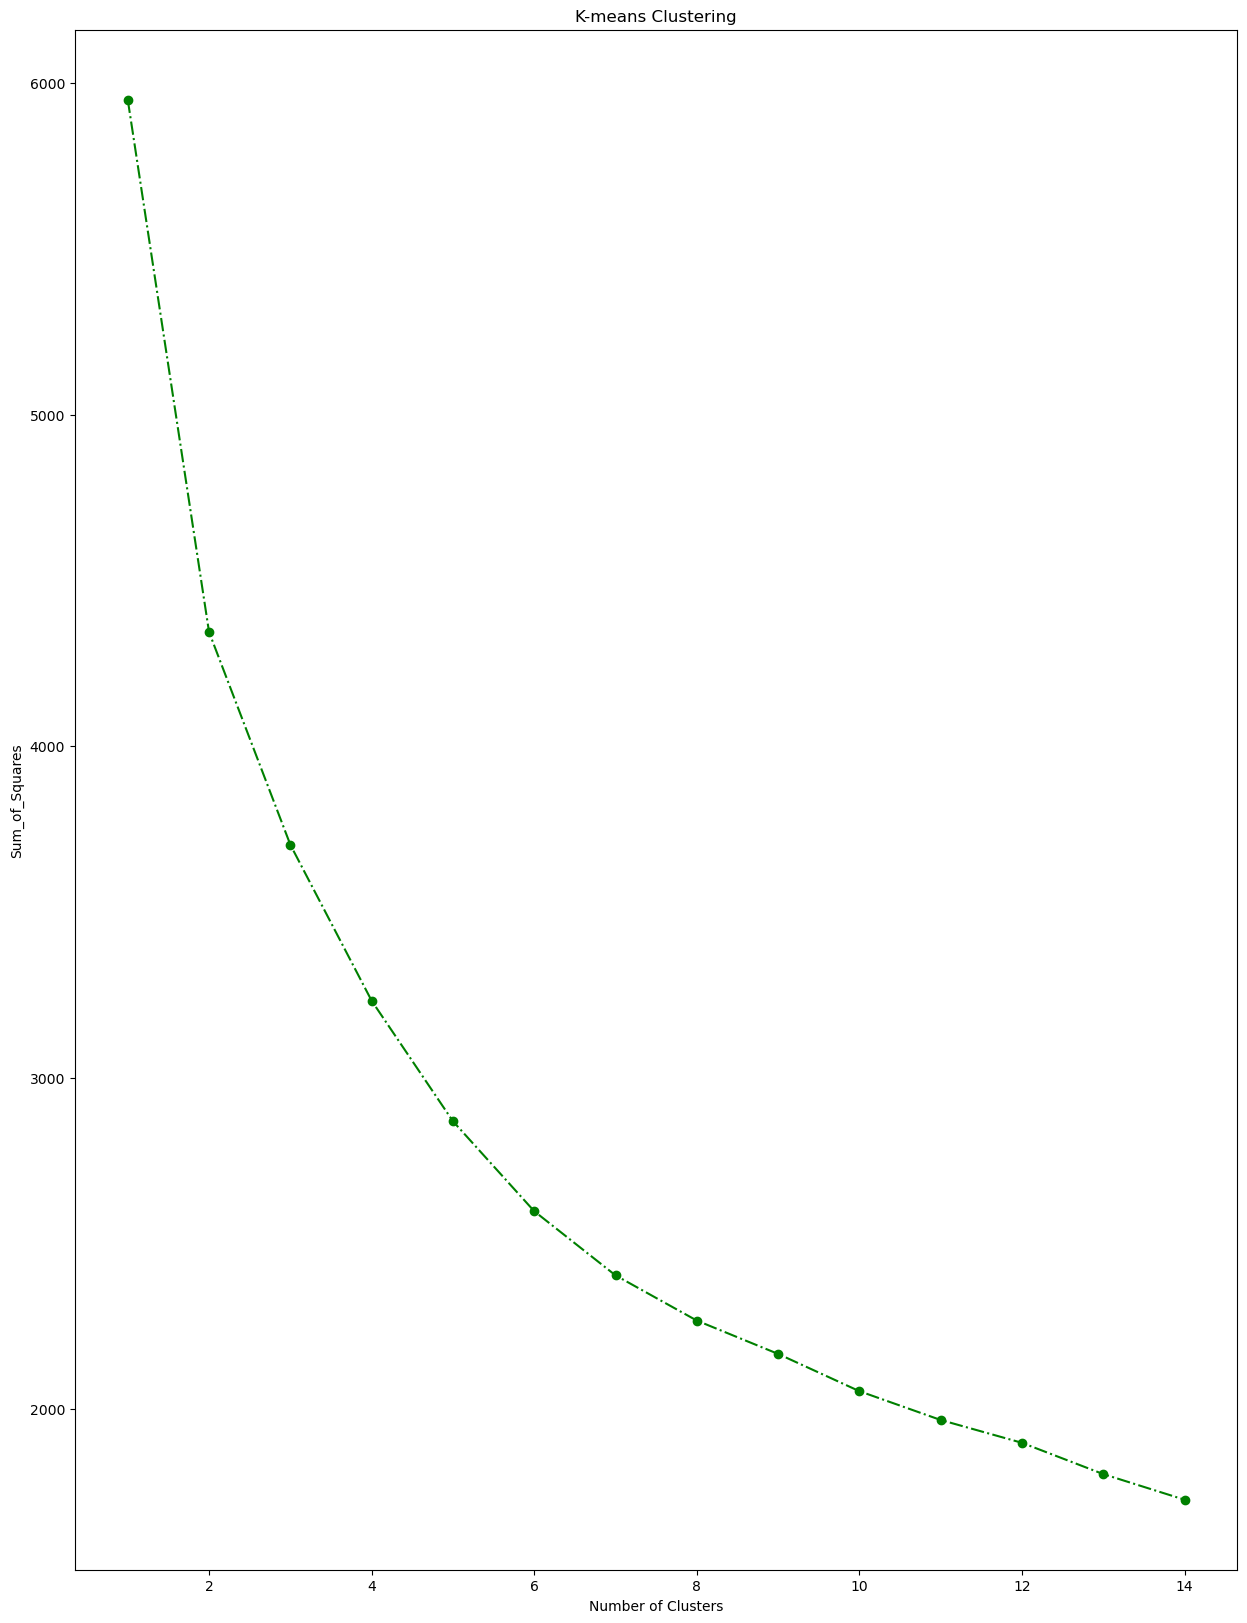

In [26]:
plt.figure(figsize = (15,20))
plt.plot(range(1, 15), Sum_of_Squares, marker = 'o', linestyle = '-.',color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum_of_Squares')
plt.title('K-means Clustering')
plt.show()

## k or clusters = 4

In [27]:

kMean = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(data)
y_mean = kmeans.fit_predict(data)
y_mean

array([ 6,  0,  3,  2, 13,  0,  1,  7, 12,  0,  7,  1,  2,  6,  8,  2,  2,
        7, 11, 11,  2,  7, 10,  0,  9,  6,  2, 11, 11,  1,  7,  5,  2,  7,
        1,  1,  8,  6,  2,  0,  2,  9, 10,  9,  6,  9, 12,  2,  2,  1,  0,
        5, 12,  0, 10, 12,  2,  8, 11,  6,  5, 11, 11,  3,  2,  1, 11,  2,
        6, 12,  8,  7, 11, 12,  1, 12,  6,  2,  9, 11, 11, 10,  9,  6,  5,
        2,  8,  2,  2, 10, 11,  1,  2, 12,  8,  6,  6,  1, 12,  8, 12,  9,
       11,  6, 12,  5,  6, 12,  1,  7, 11, 10,  1, 12,  1,  1,  2, 11,  3,
        1,  2,  2,  8, 11,  1,  6,  2,  2, 12,  2, 11, 11, 12,  8, 12,  8,
        0,  2,  6, 12,  5,  2, 12,  1,  3, 10, 11,  7,  2,  2,  1,  5,  8,
        6,  1,  5,  0,  0, 12, 10,  2, 10, 11,  1,  2,  8,  8,  1,  1,  7,
        3,  1,  8,  8,  1,  5, 11,  2, 12,  0, 12,  1,  2,  4, 10, 10,  6,
        1, 11,  7, 12,  5,  7,  2, 11,  8,  2,  0,  4,  8,  0,  6,  8,  1,
        6,  6,  1, 13,  0,  8,  1,  1,  1,  7,  6, 12,  5, 10, 11, 11,  2,
        0,  1,  8,  1,  1

## Now as we have got the clusters now add a label/Feature that tells the similar charactaristic nodes belongs to which clusters



In [28]:
data['clusterLabel'] = kmeans.labels_
data.head()

Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.742915  0.312122       -0.378790 -0.718459  -0.683811   -0.590489   
1  1.489490 -0.766349        2.573721  1.384325   1.414474    1.512962   
2 -0.252518  0.312122        0.211712  0.268032   2.134141    0.801704   
3 -0.750235  0.312122       -0.674041 -0.718459  -0.421643   -0.754467   
4  1.489490 -0.766349        3.311849  5.356249   3.638900    1.716094   

   DebtIncomeRatio  clusterLabel  
0        -0.576525             6  
1         0.391387             0  
2         1.597554             3  
3        -0.576525             2  
4        -0.442507            13

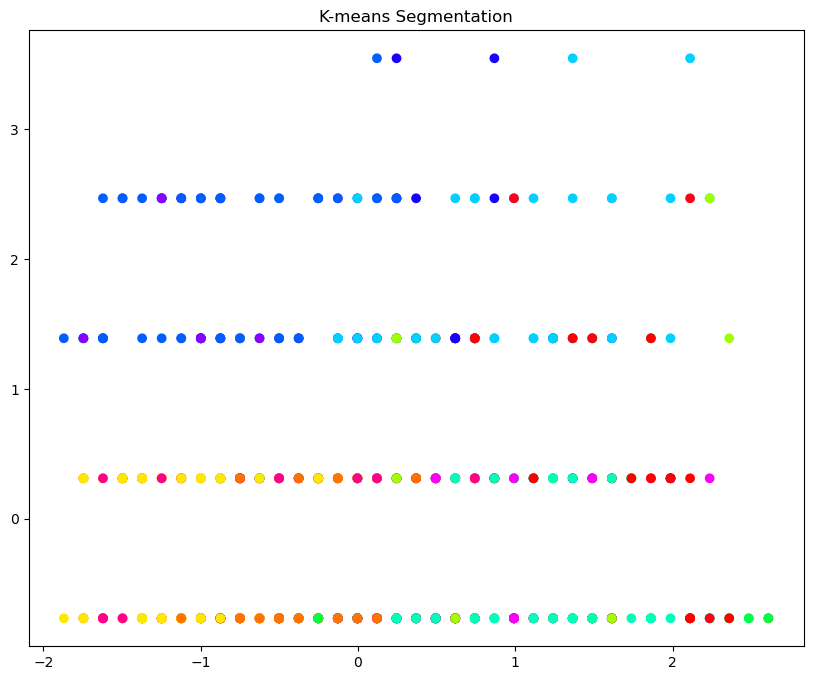

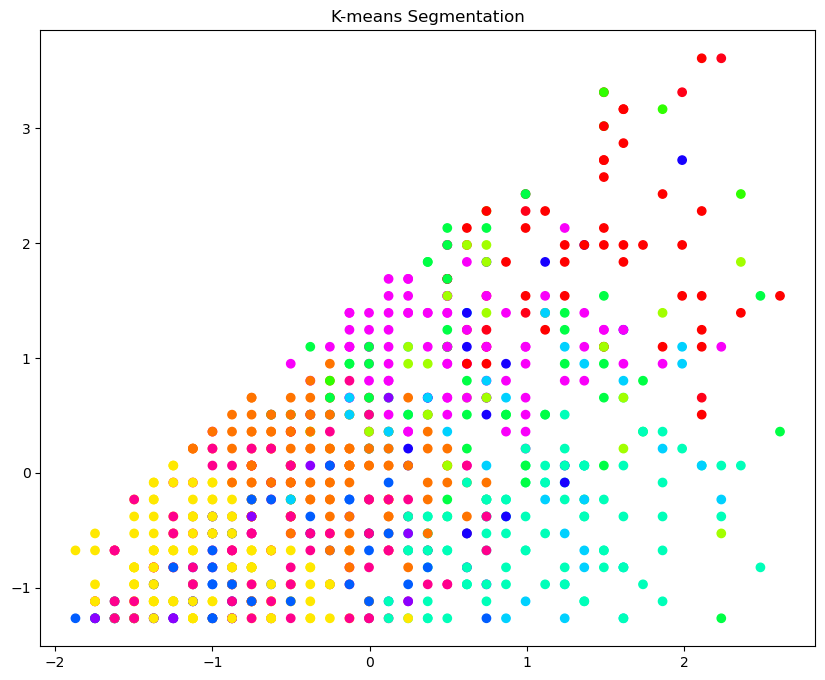

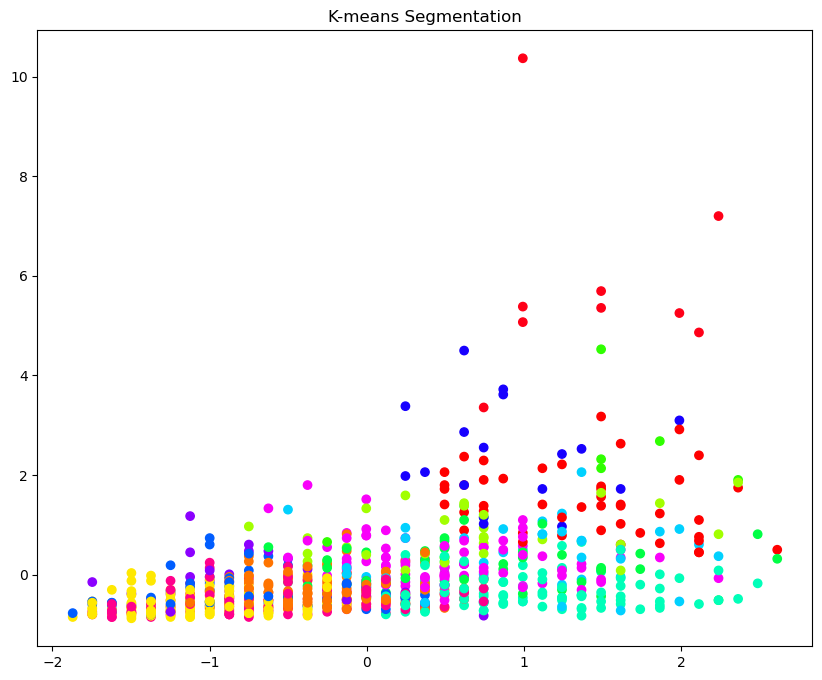

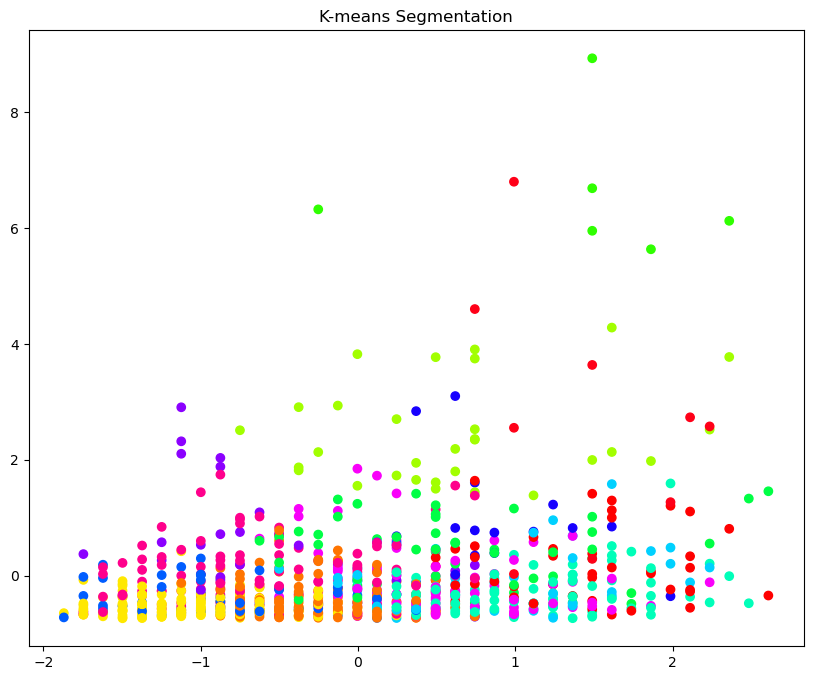

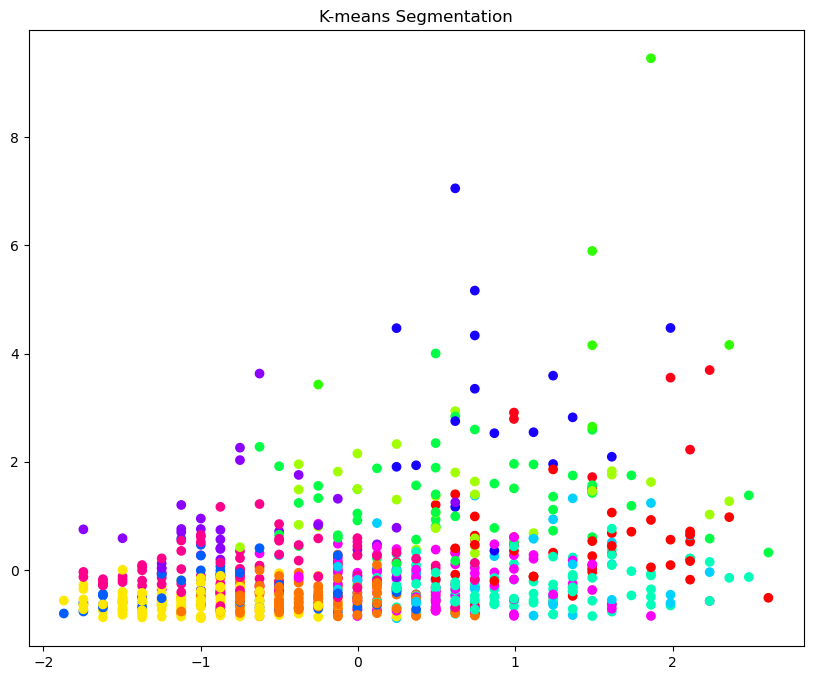

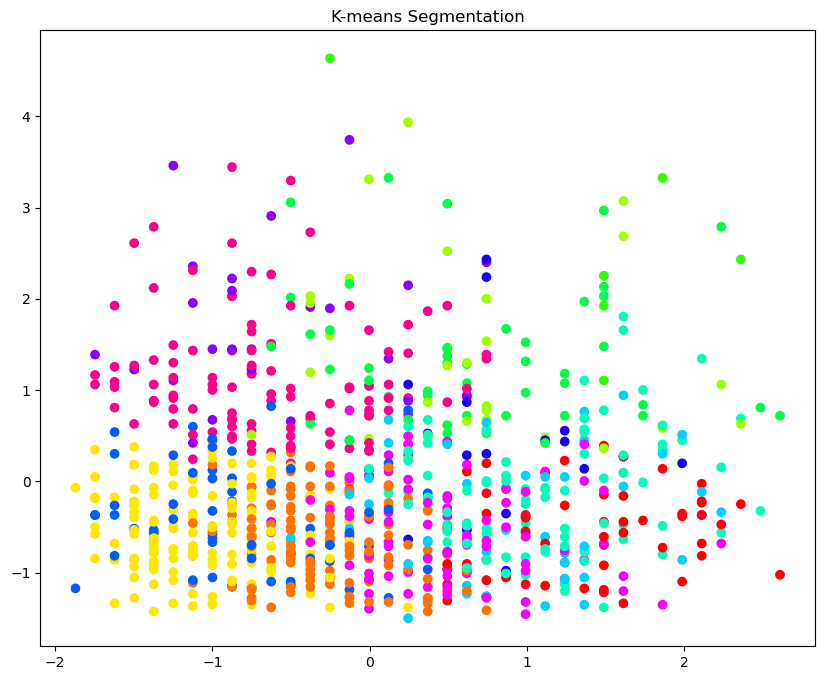

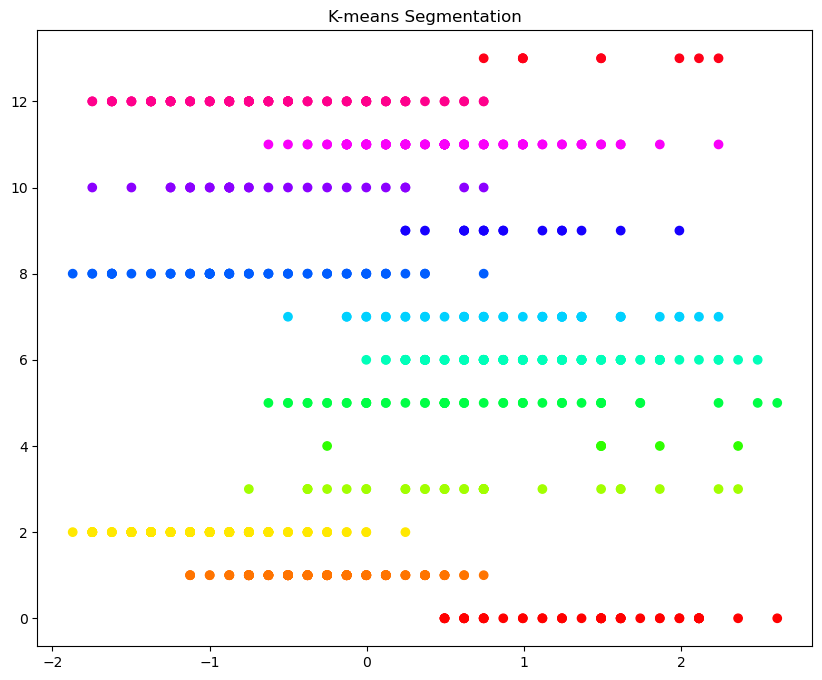

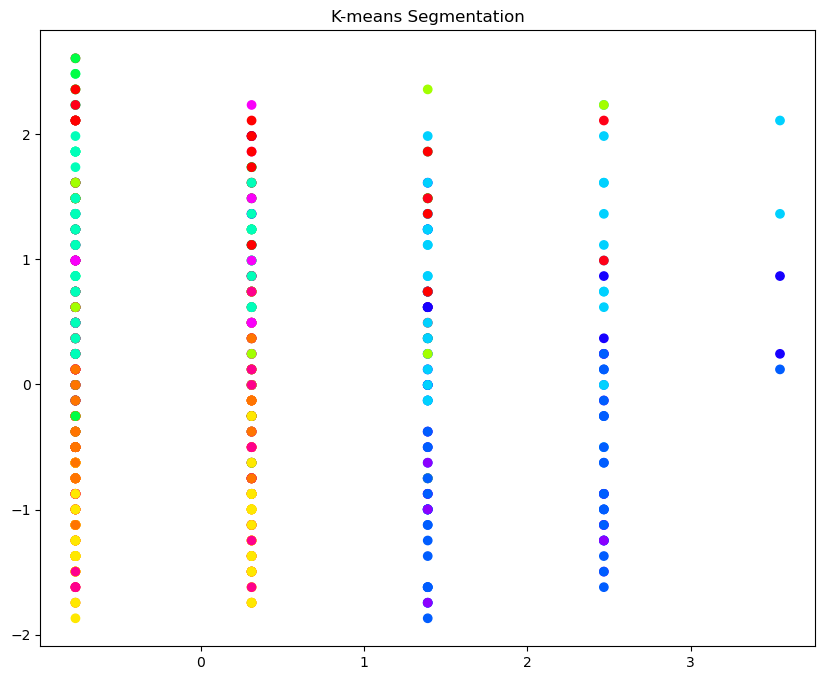

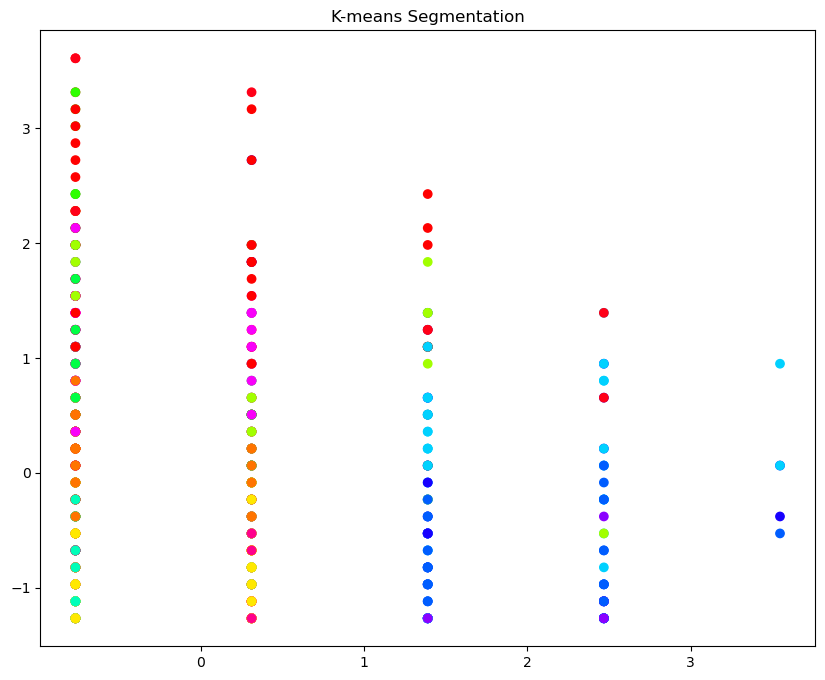

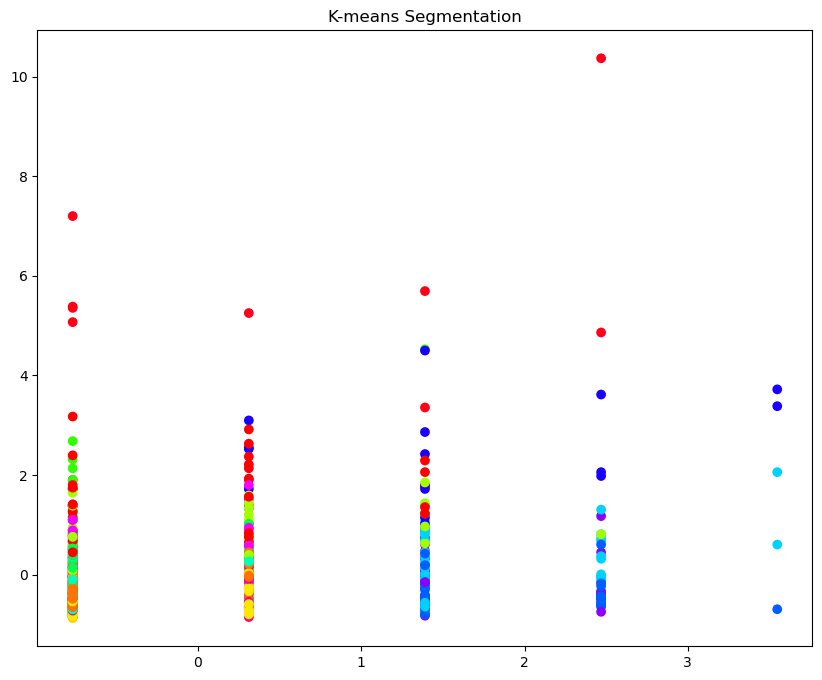

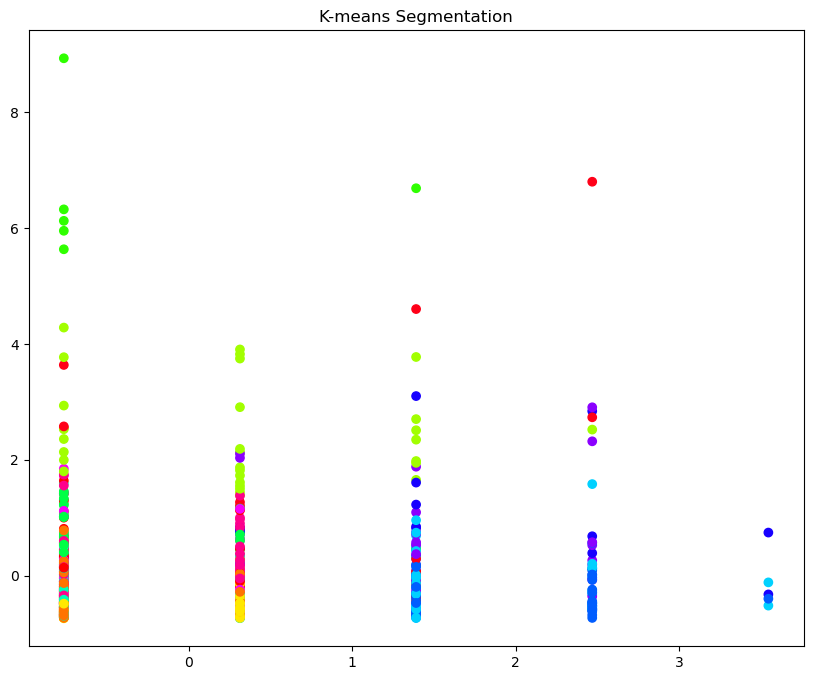

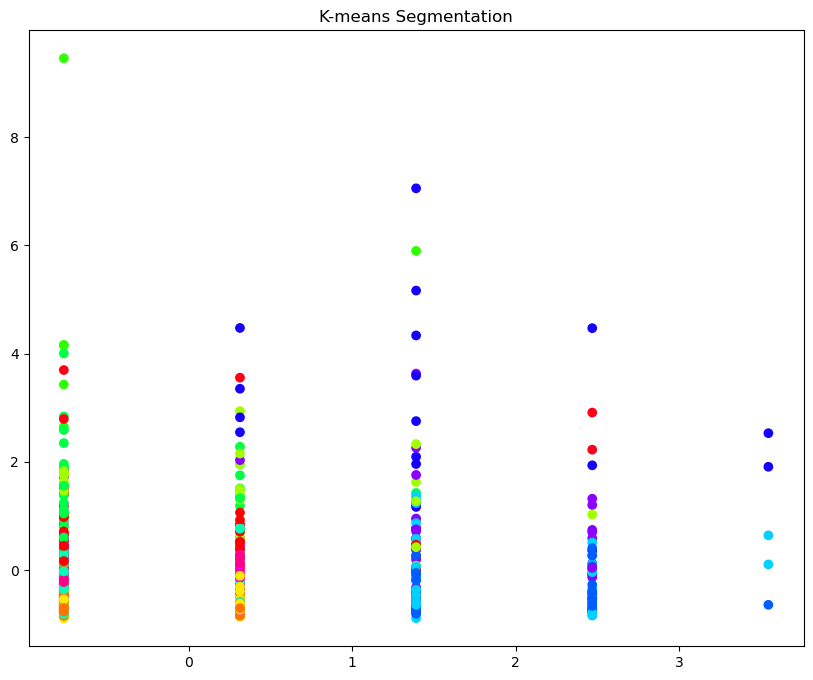

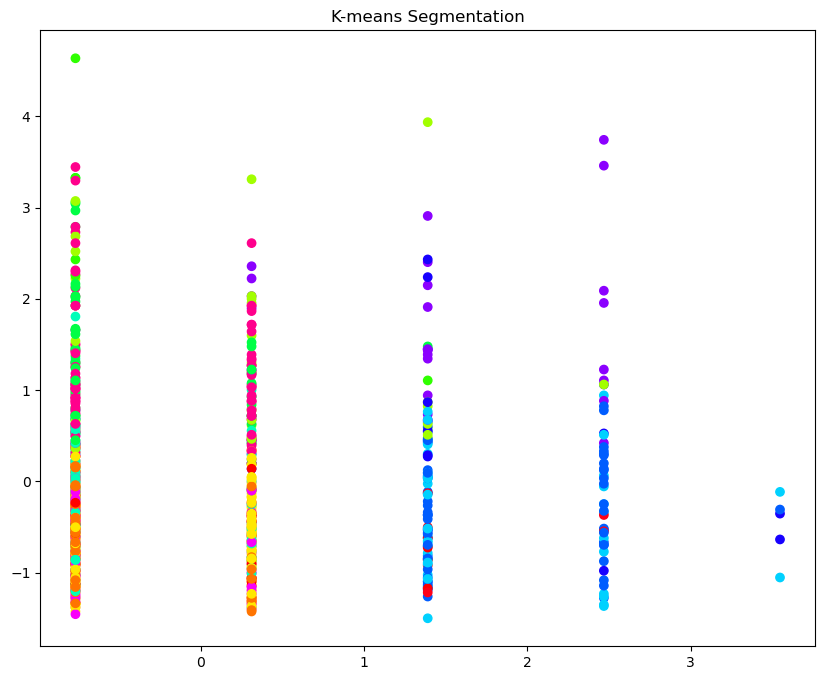

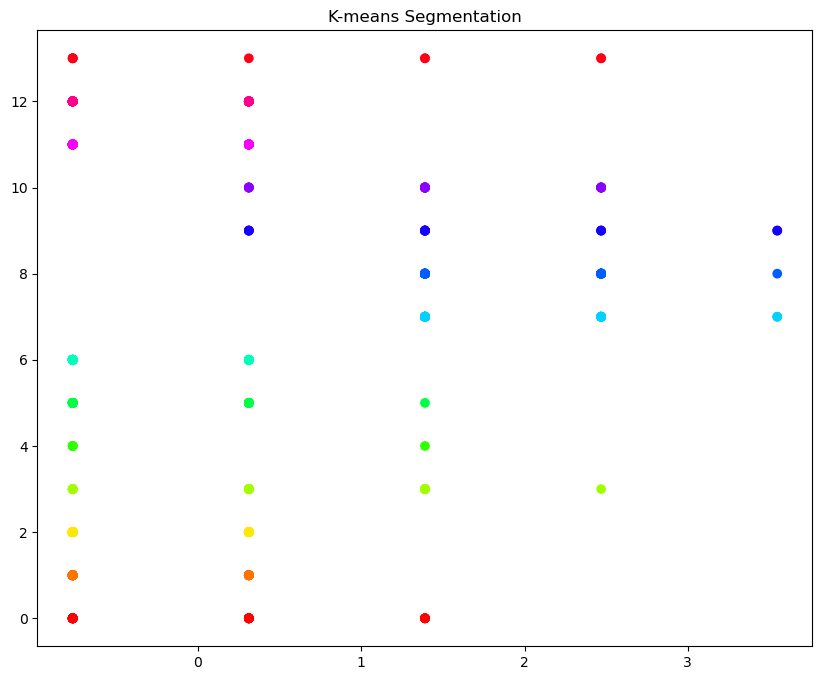

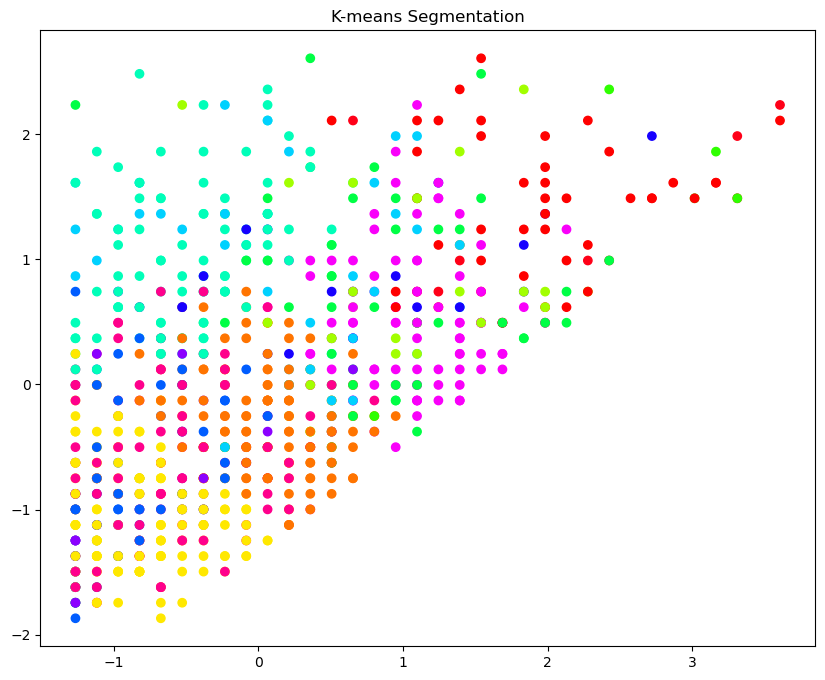

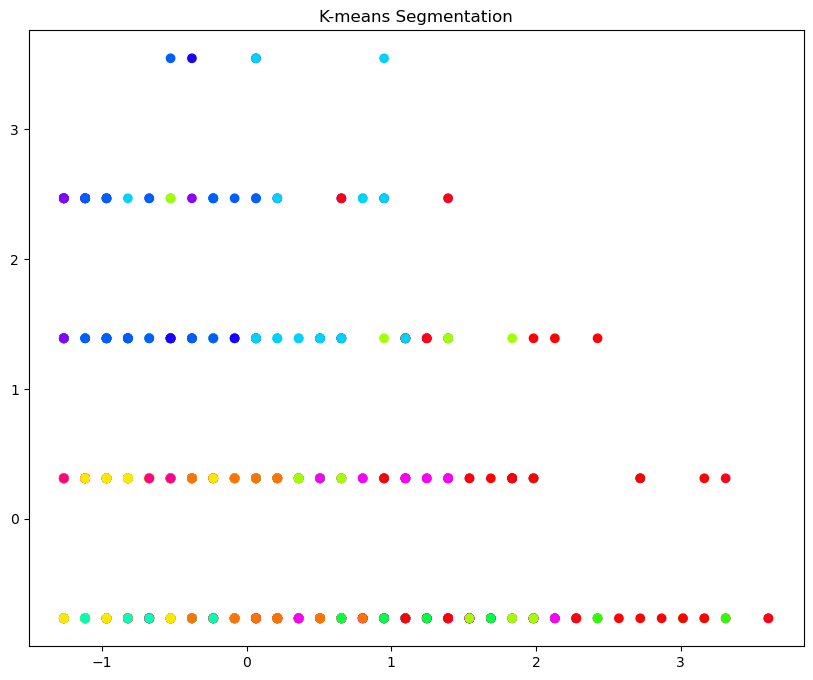

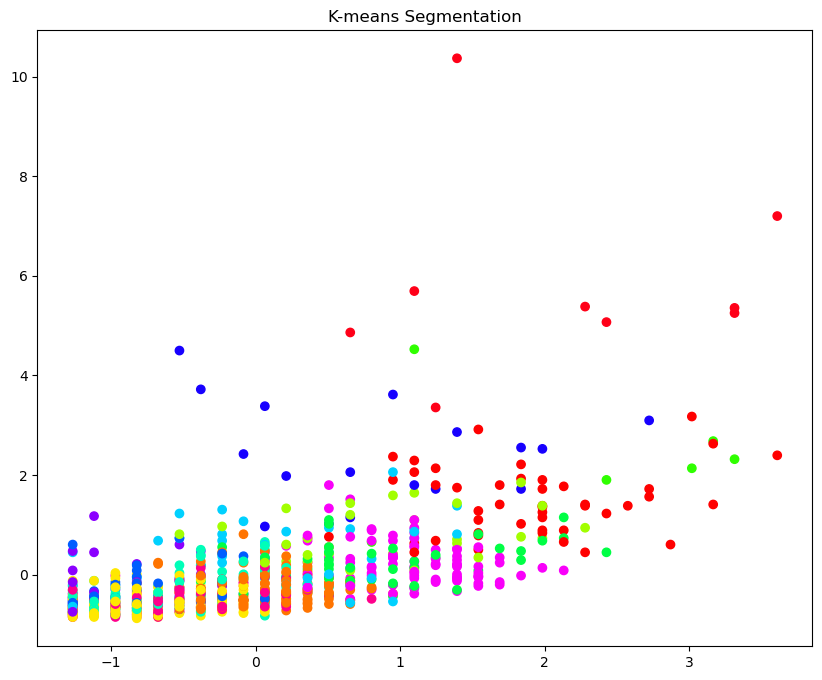

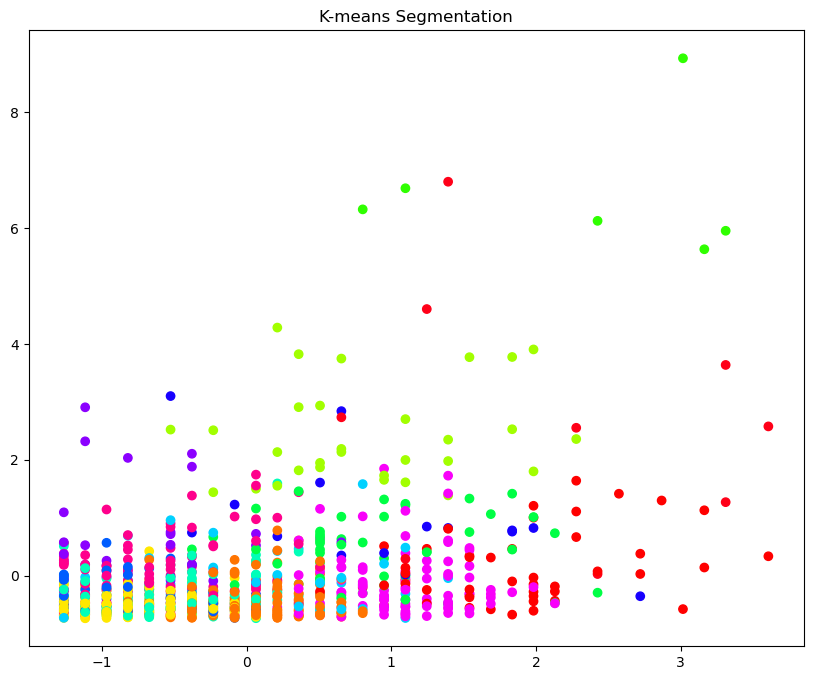

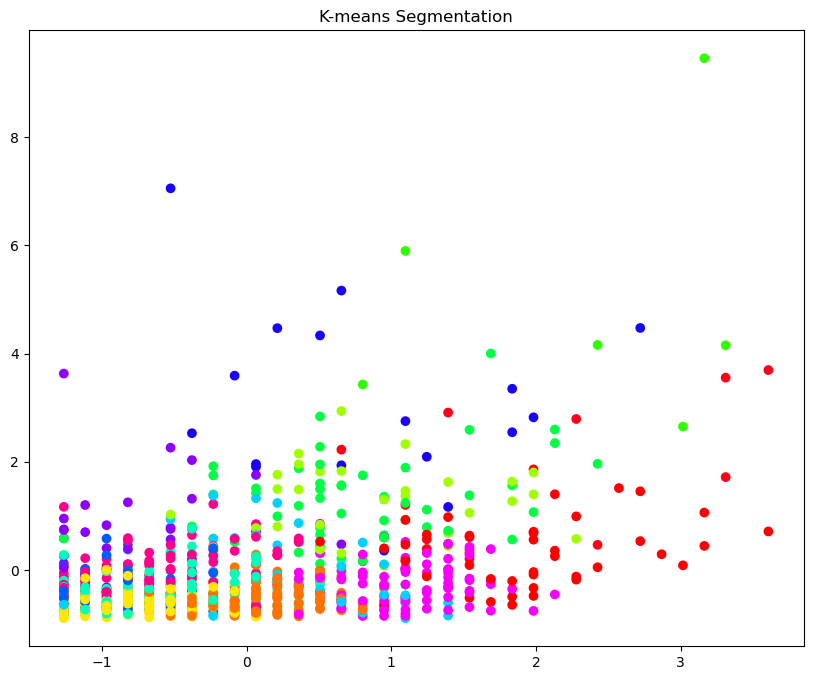

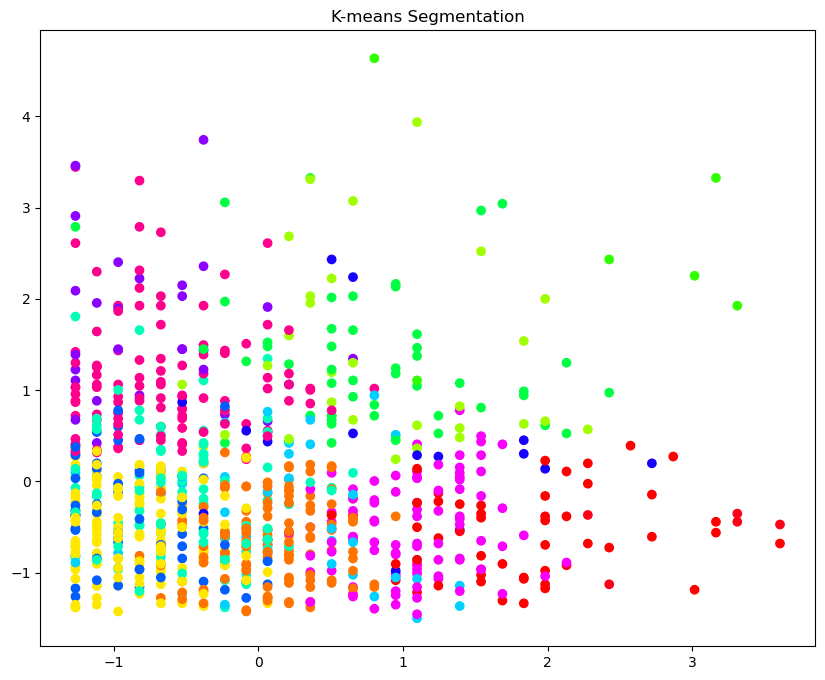

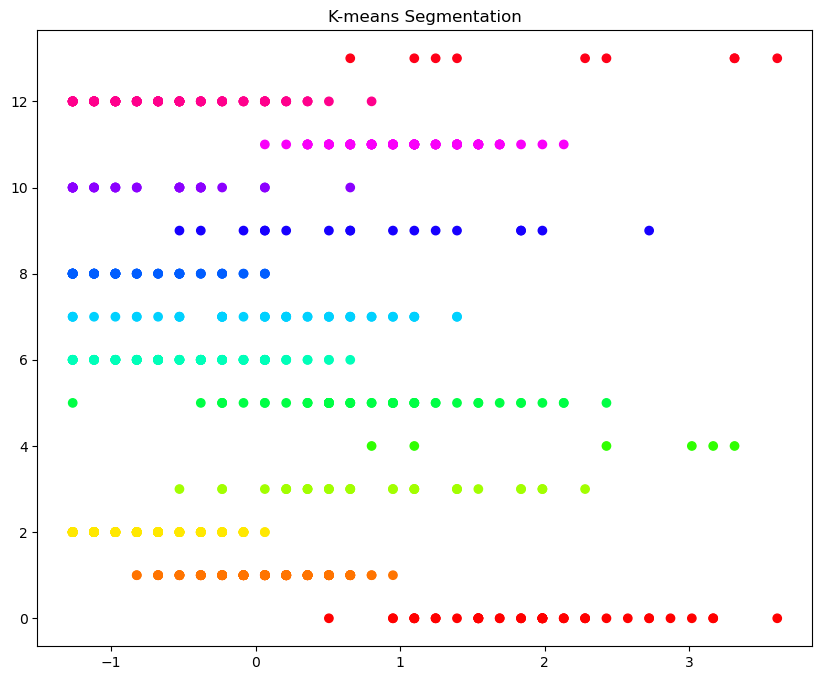

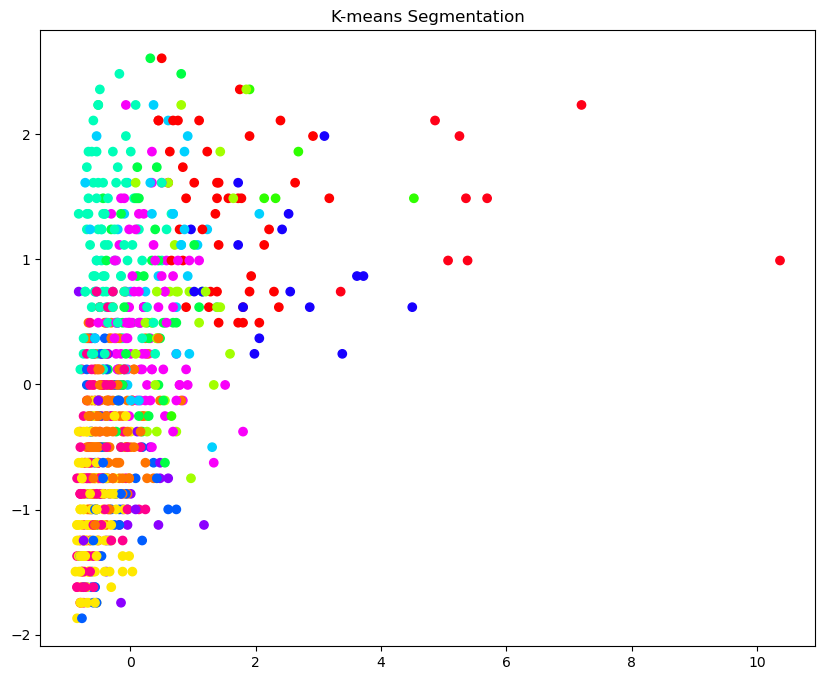

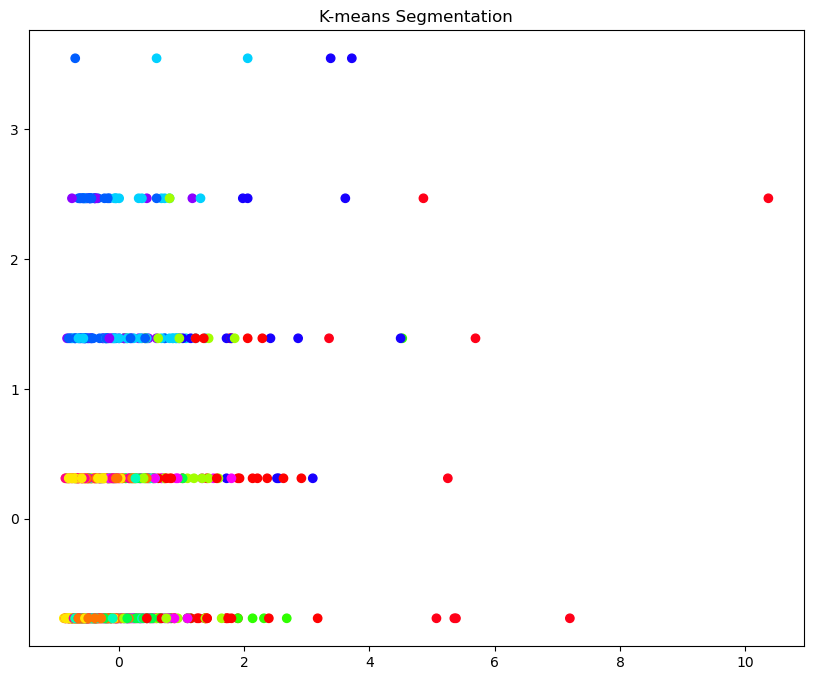

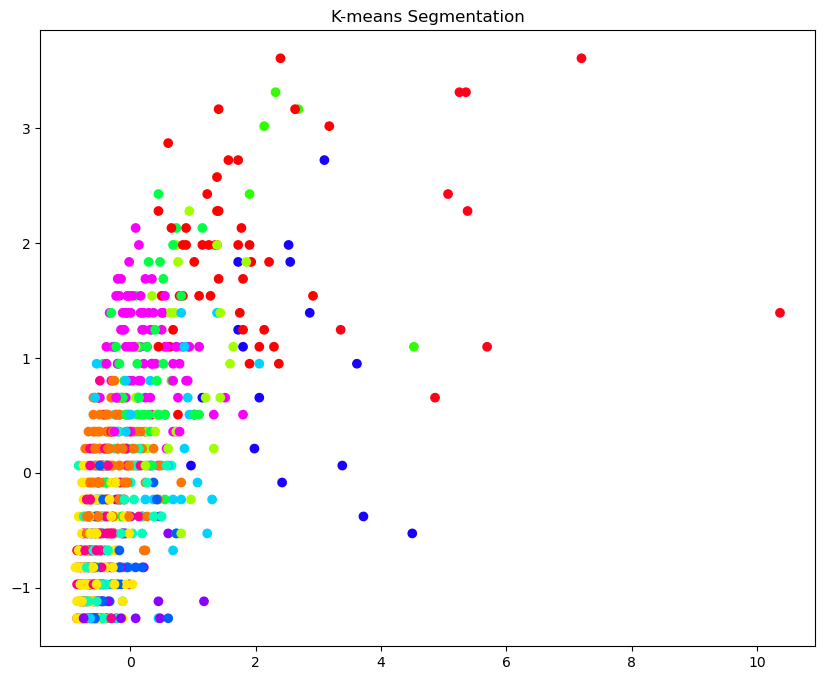

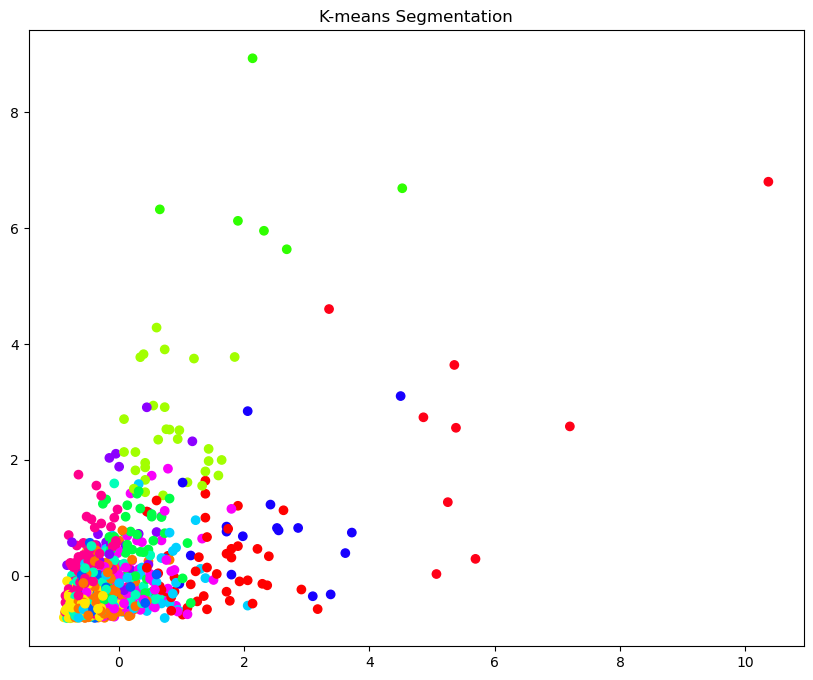

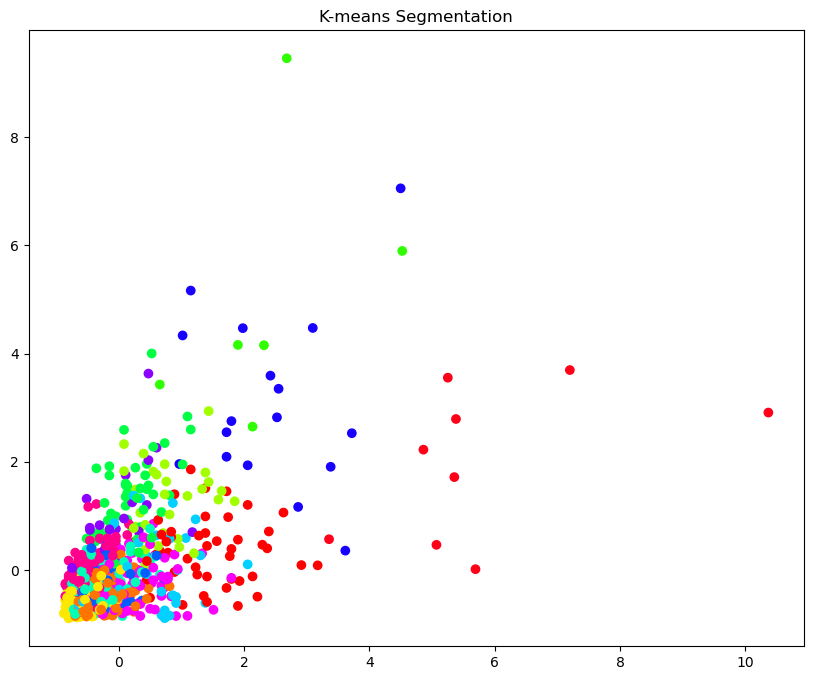

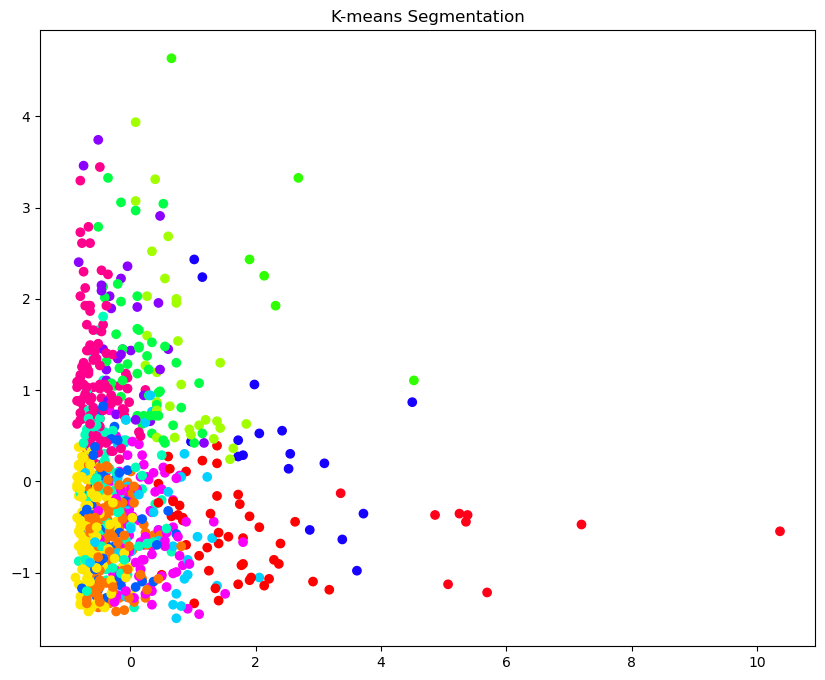

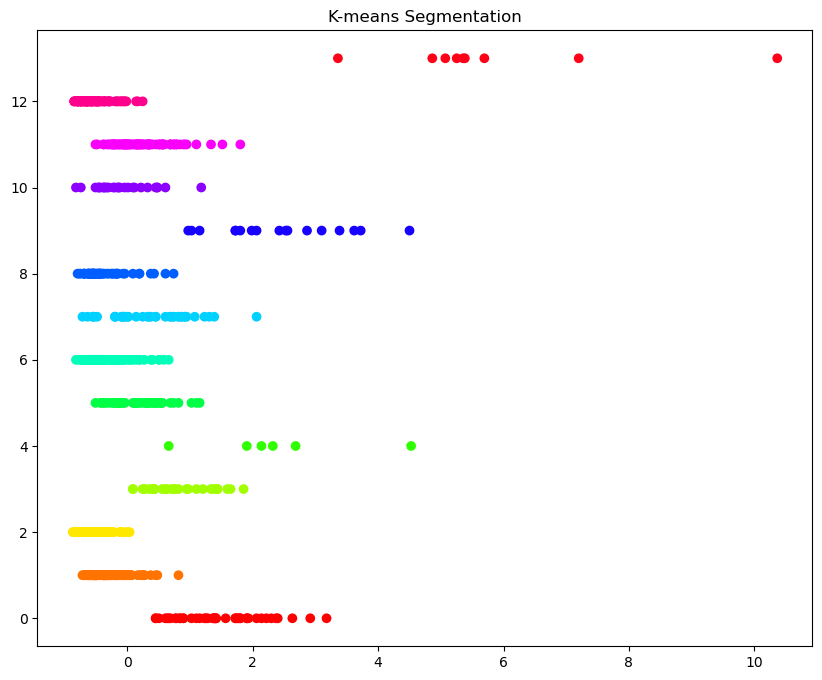

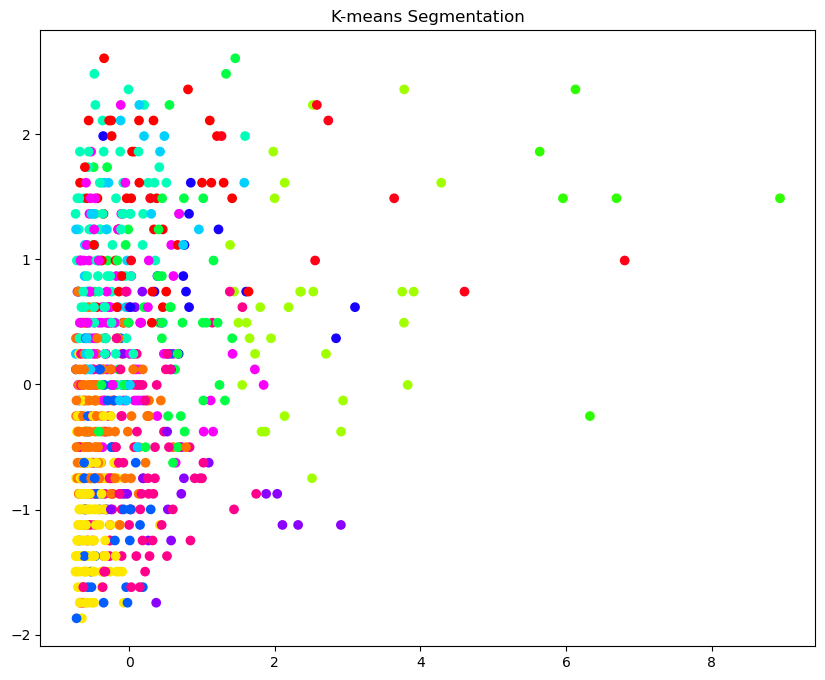

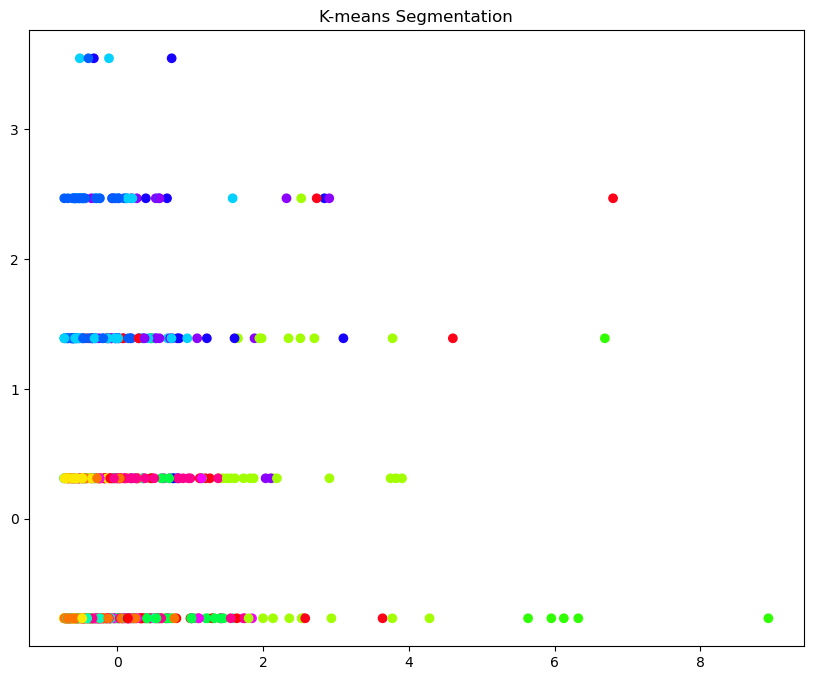

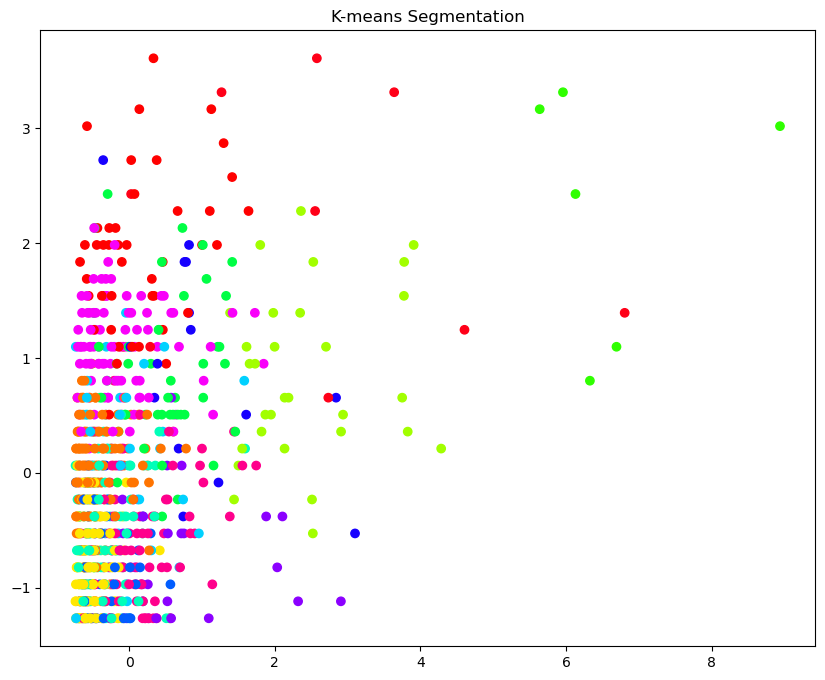

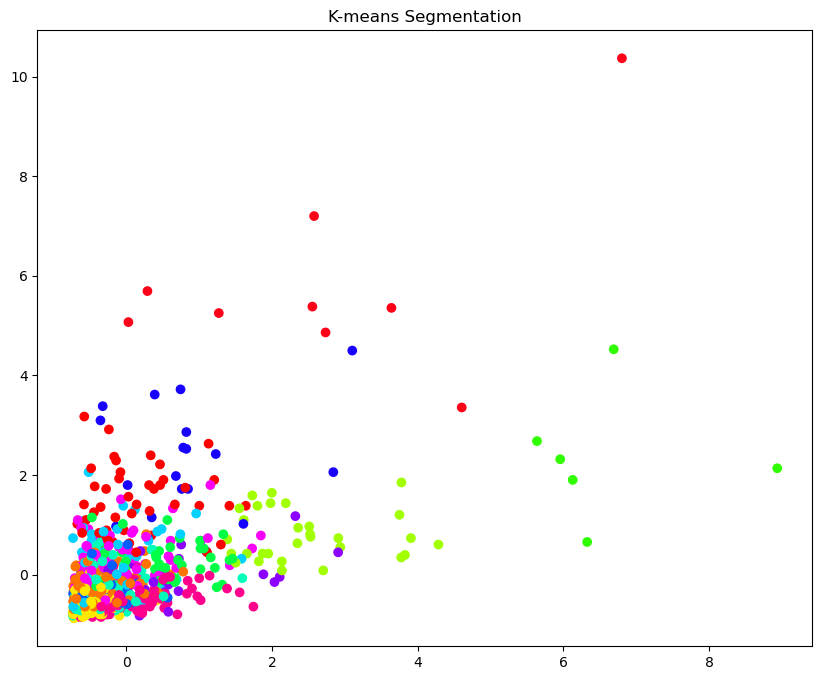

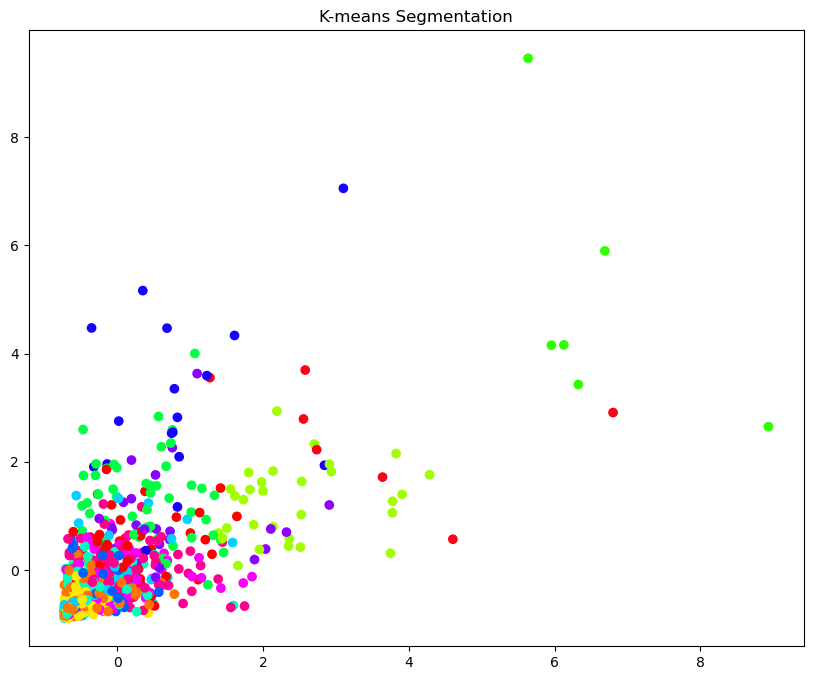

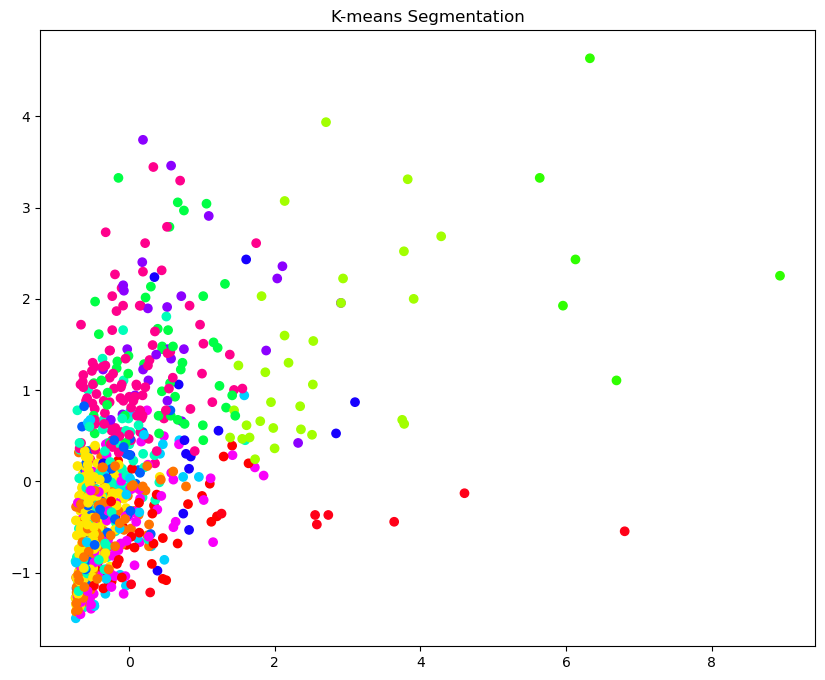

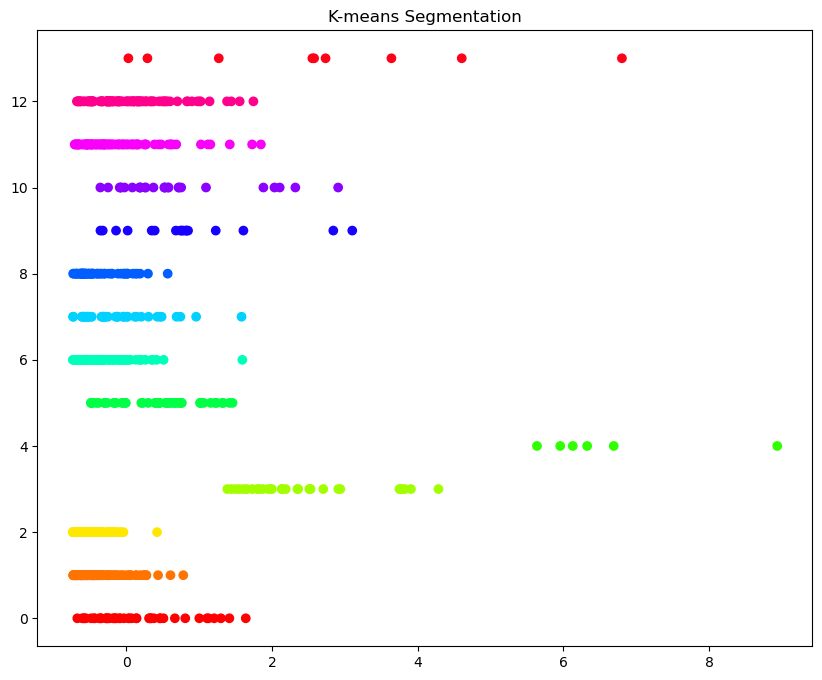

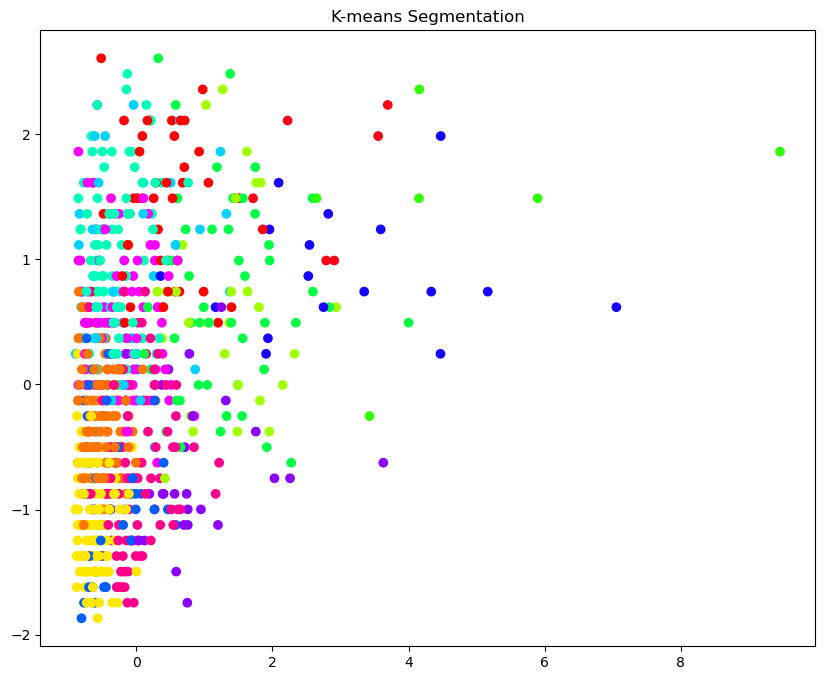

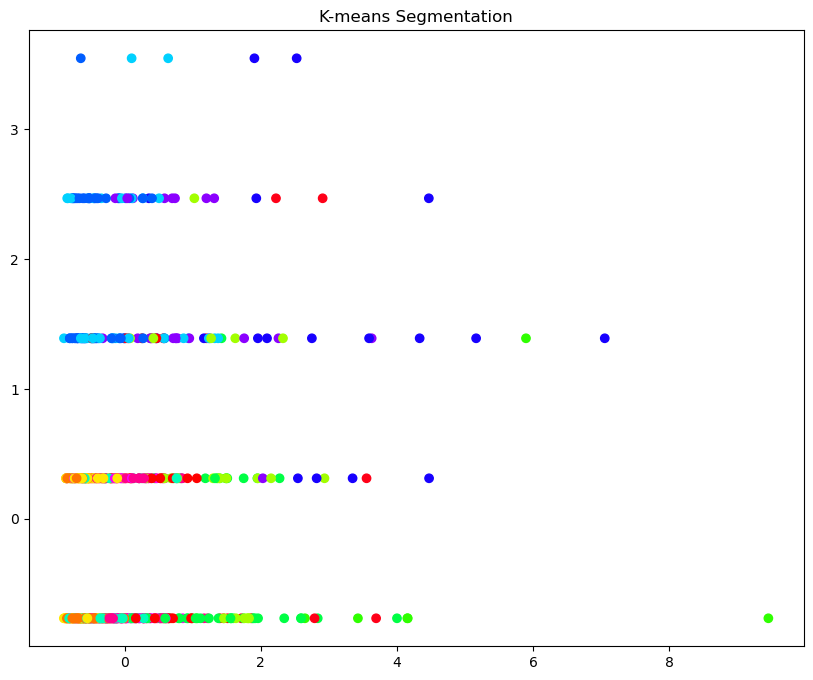

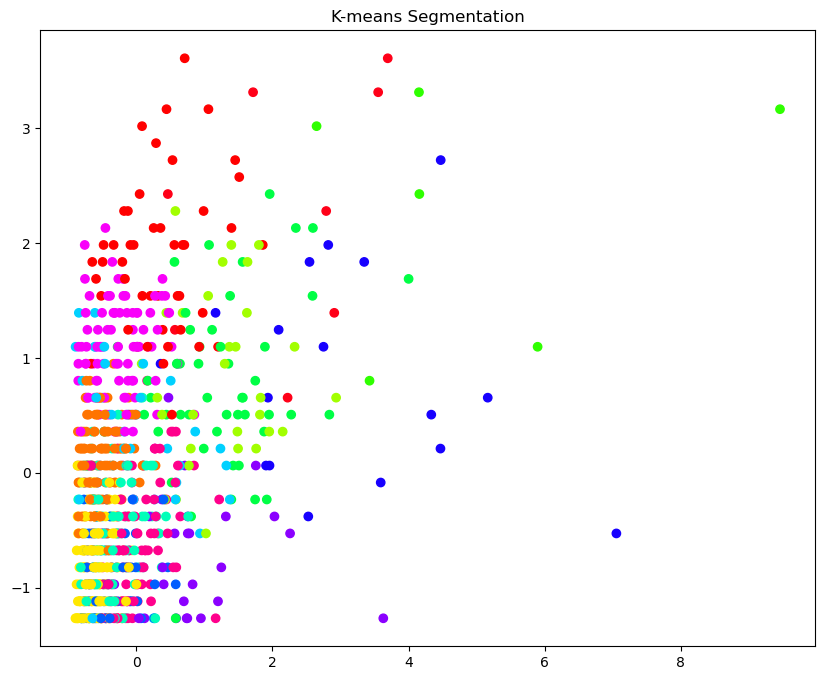

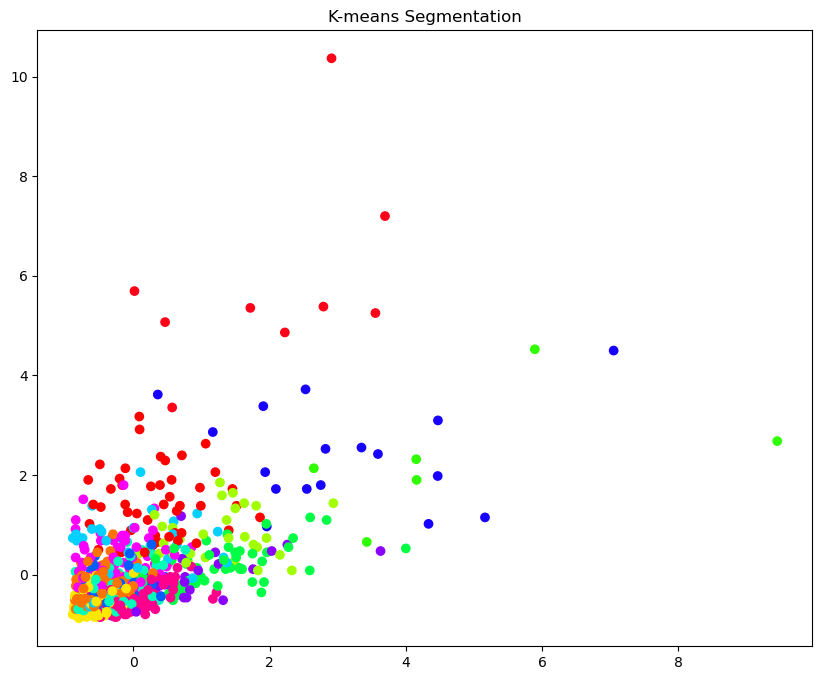

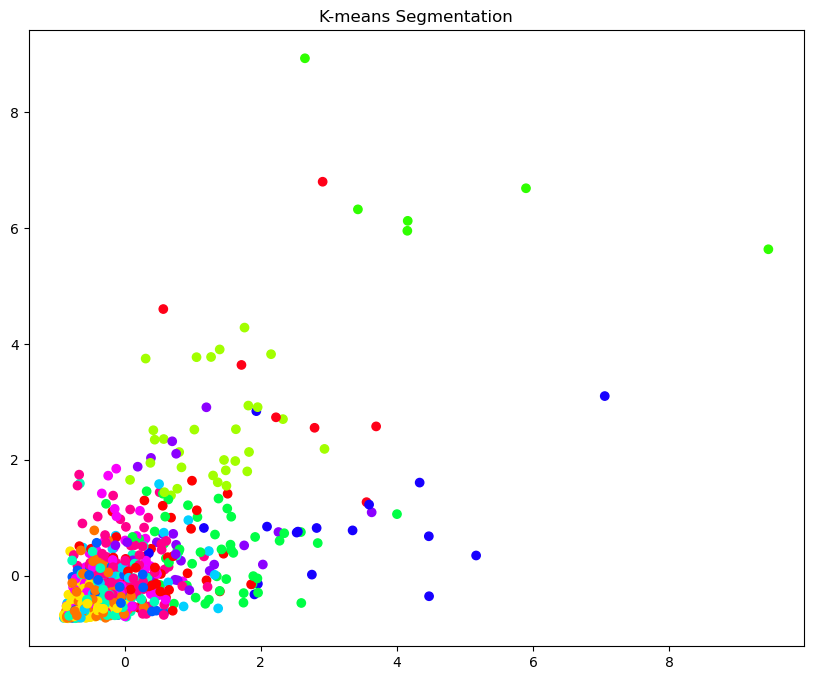

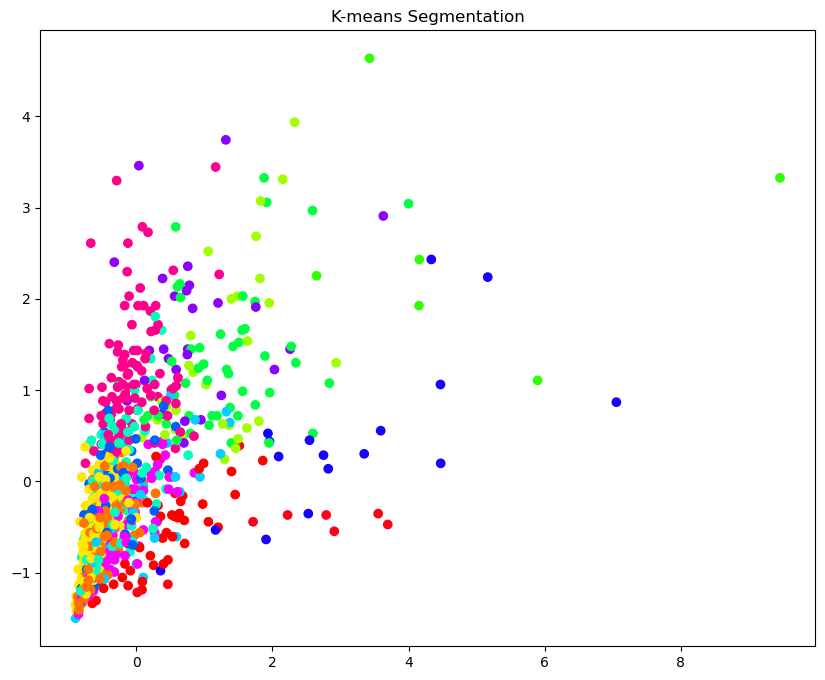

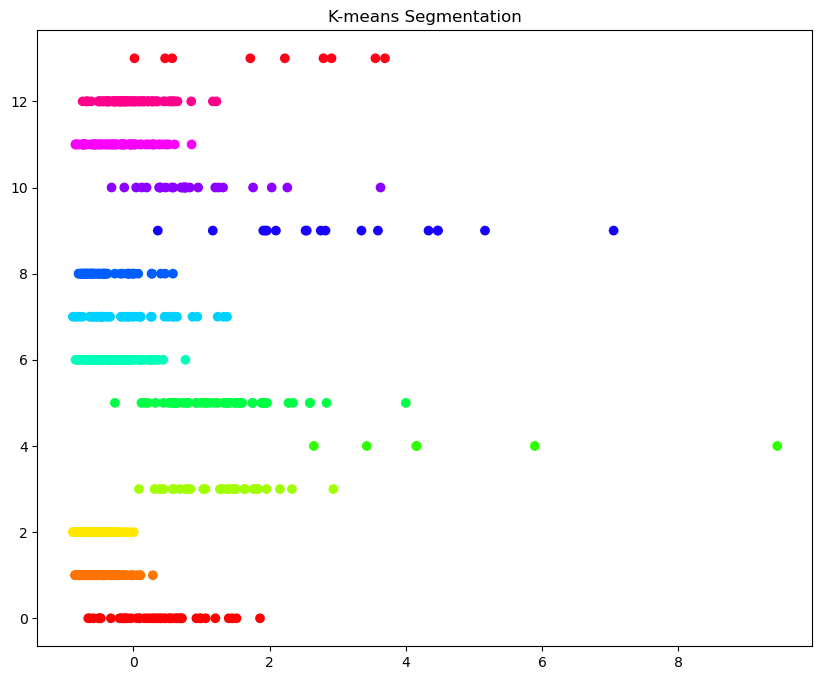

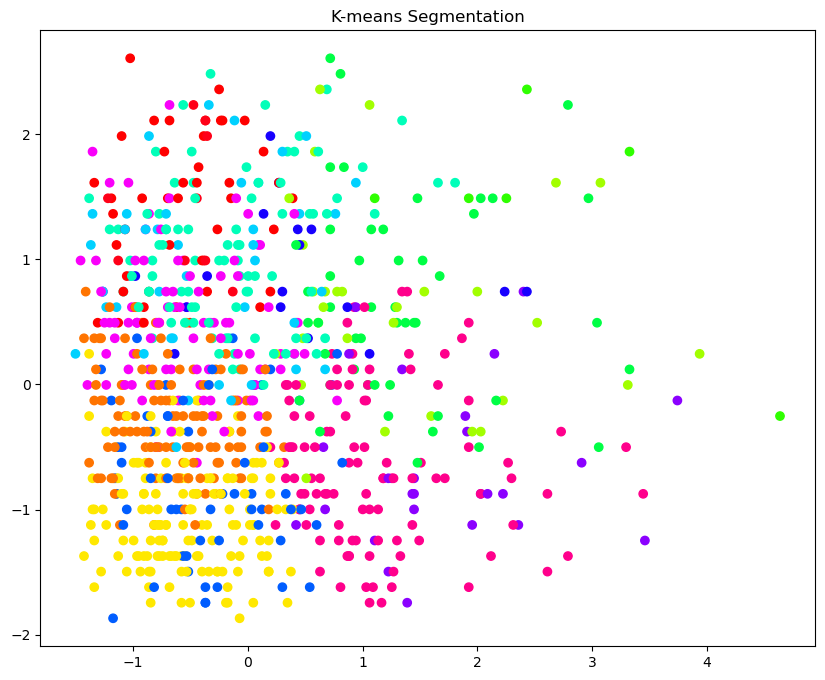

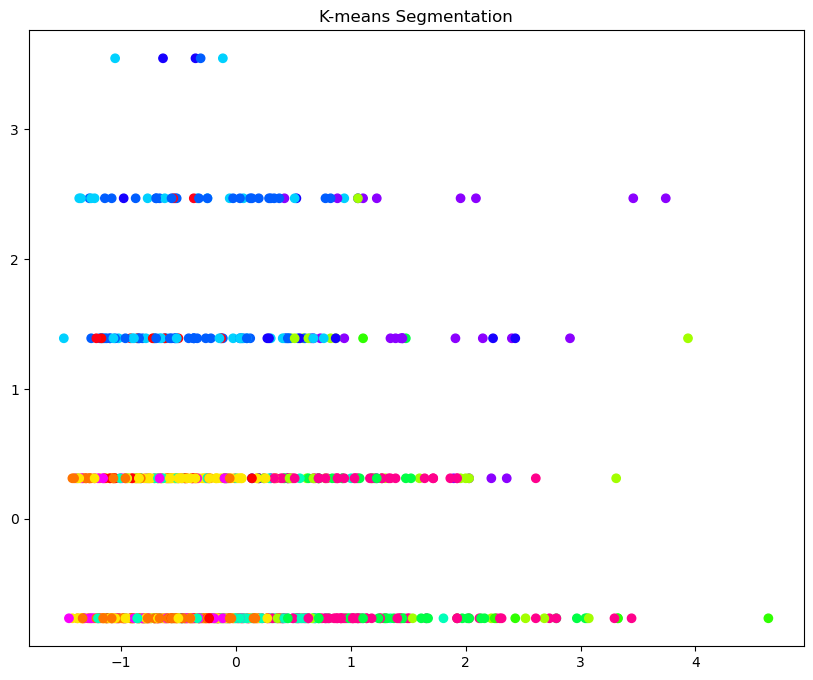

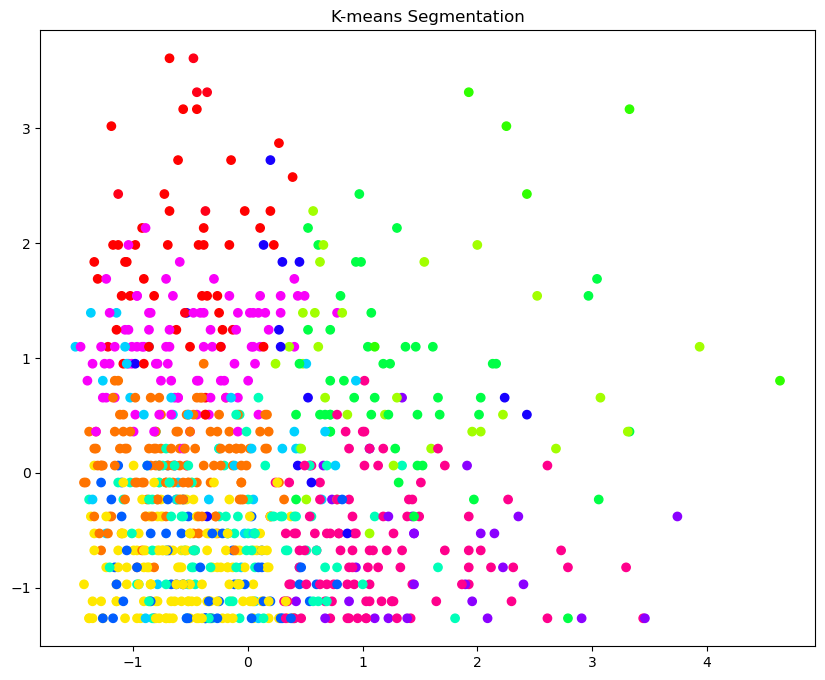

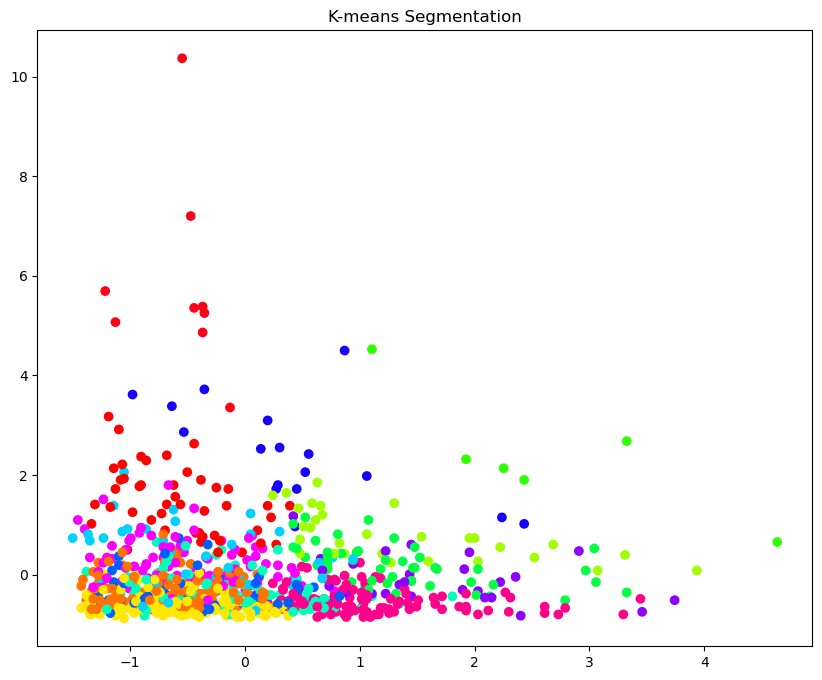

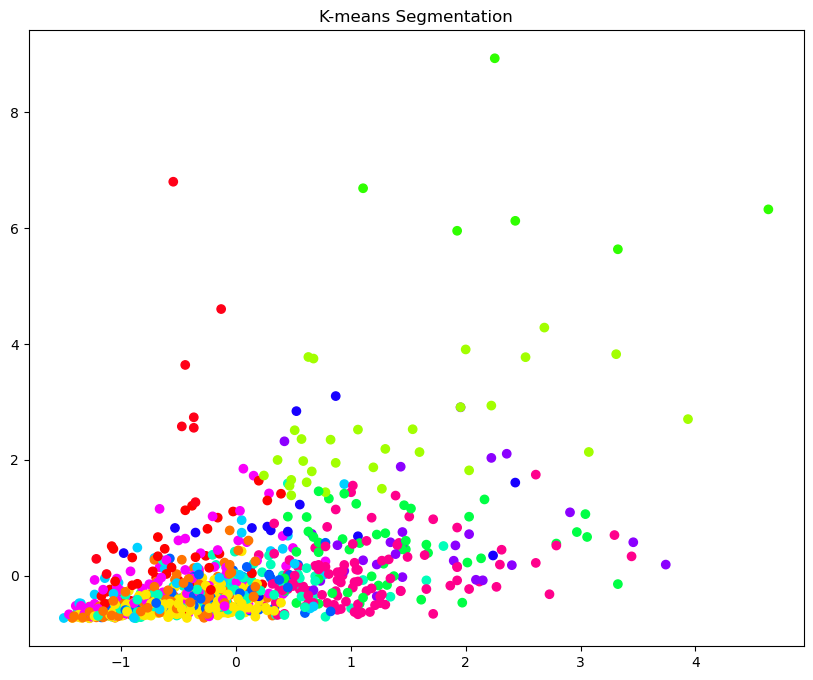

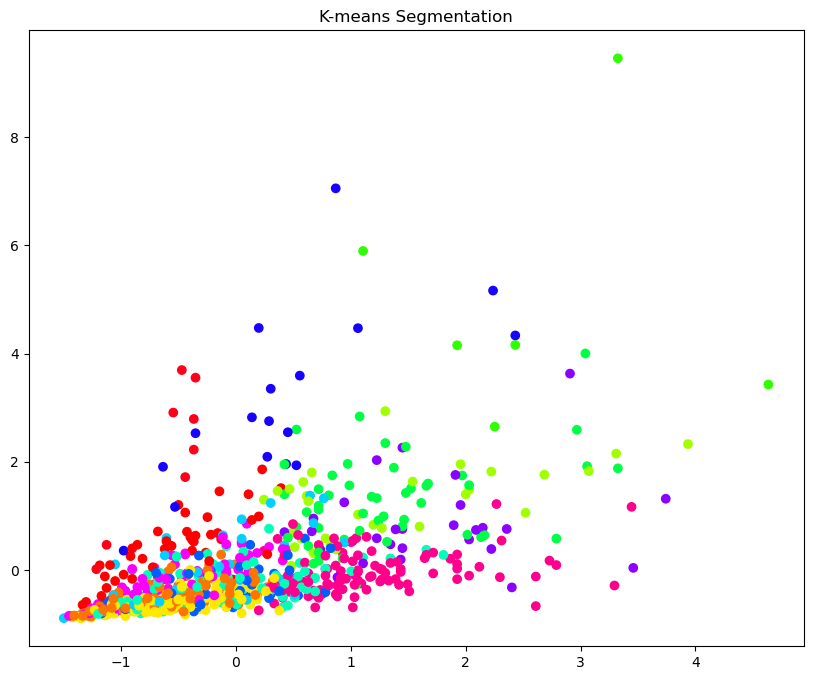

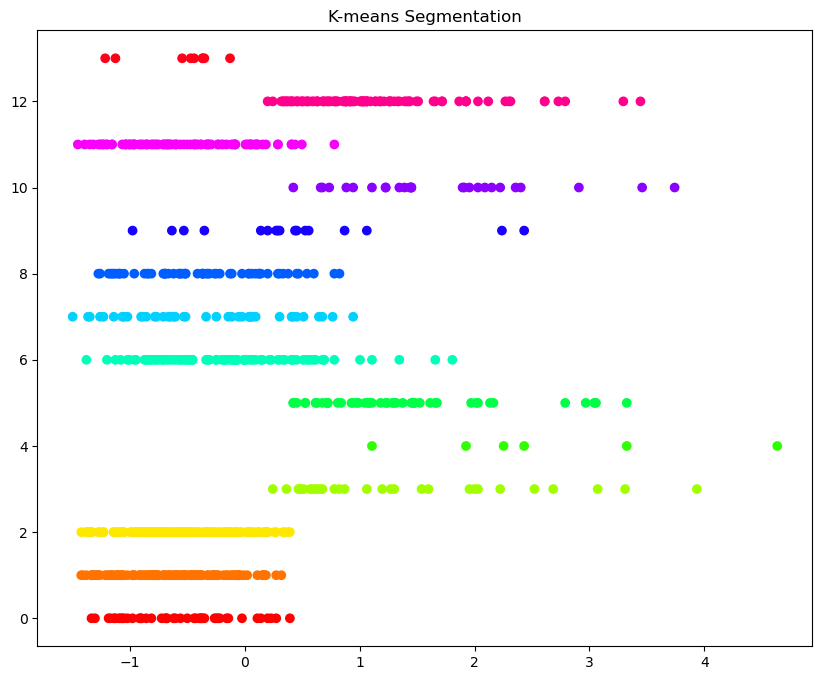

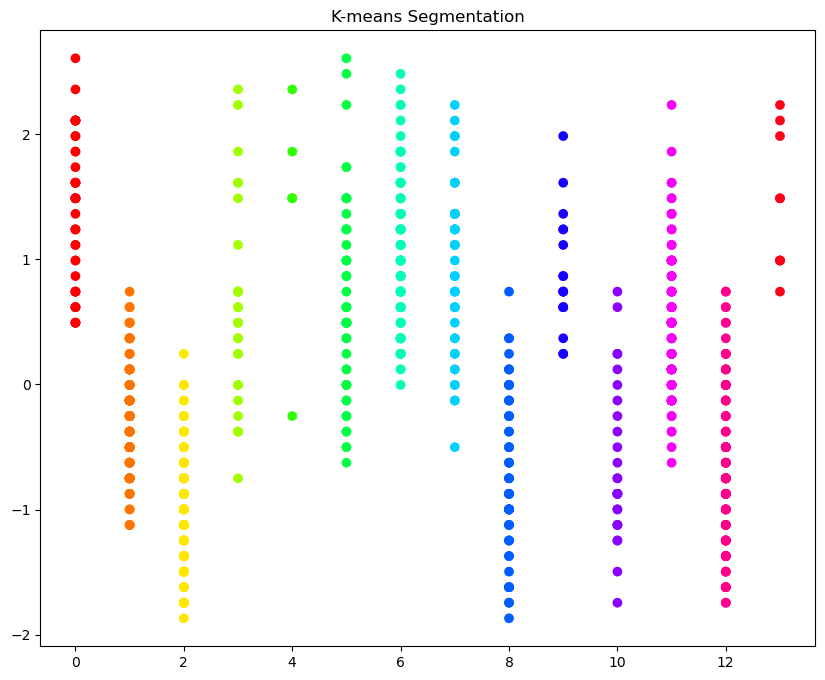

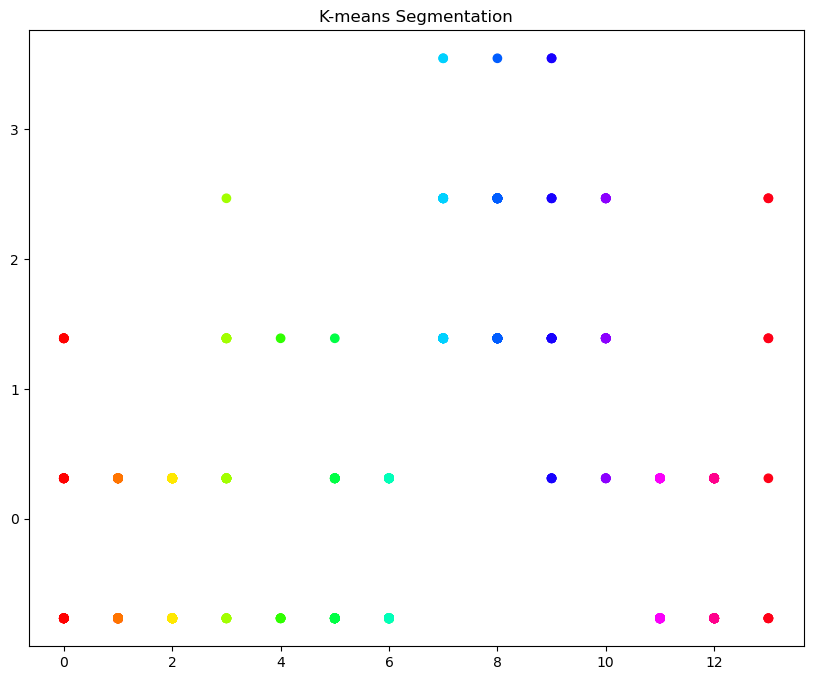

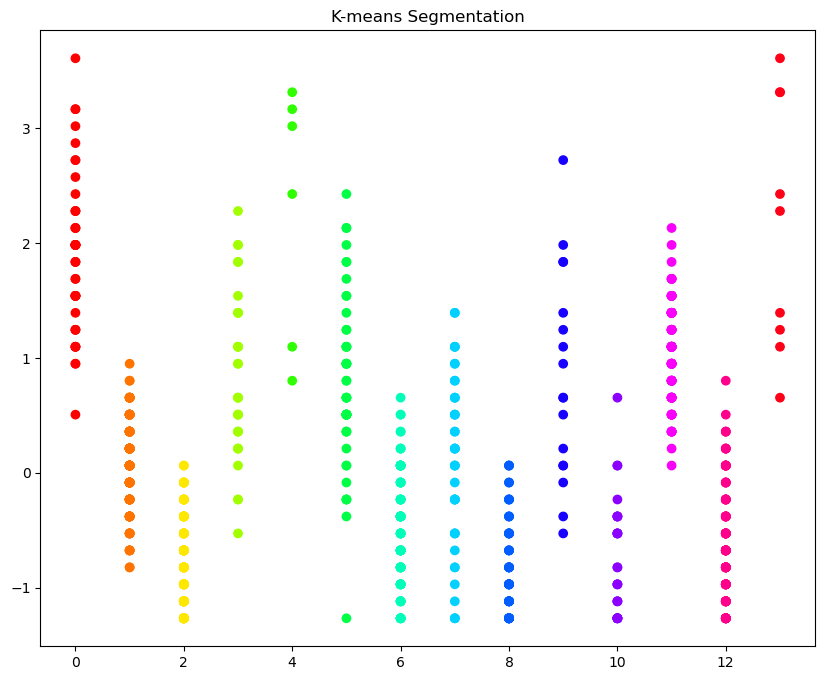

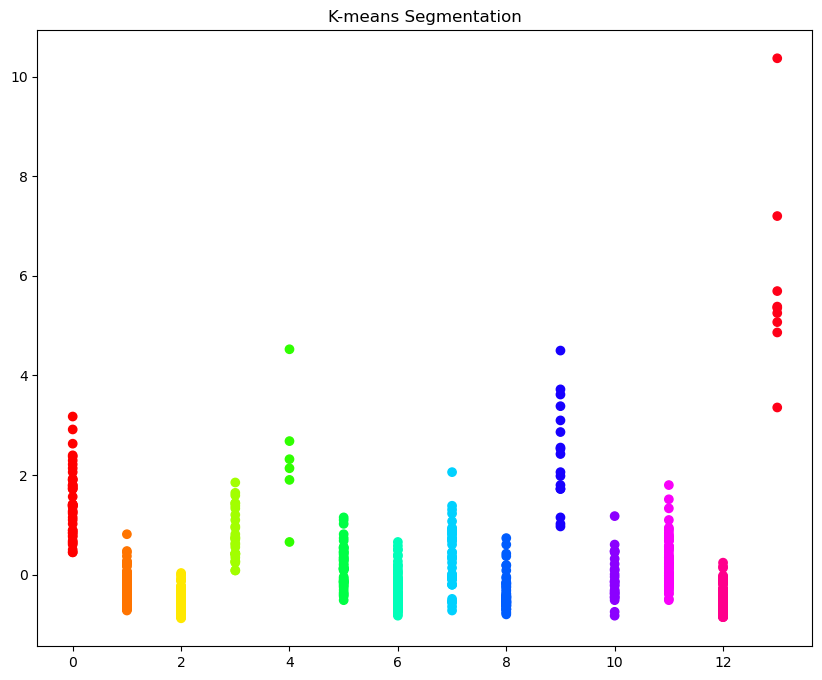

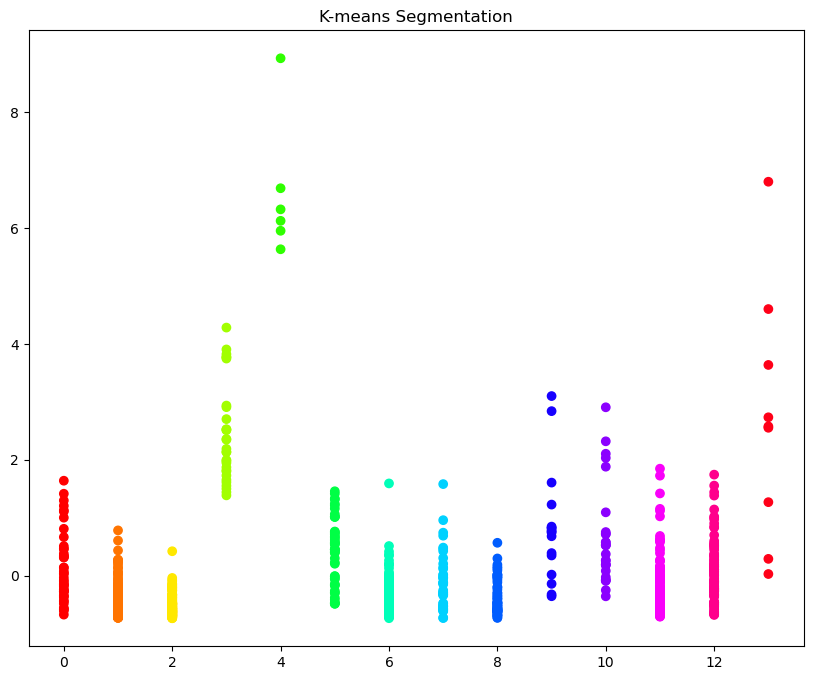

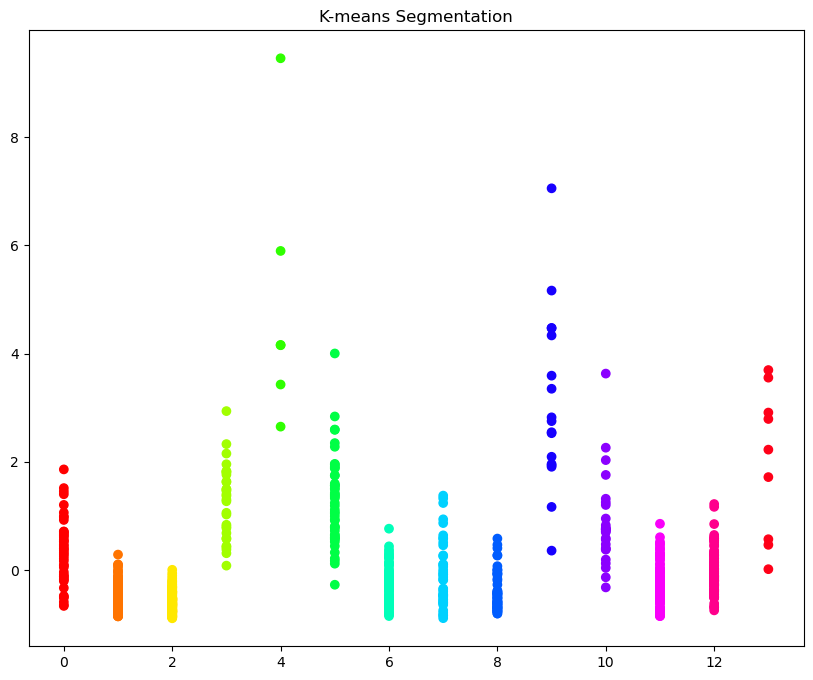

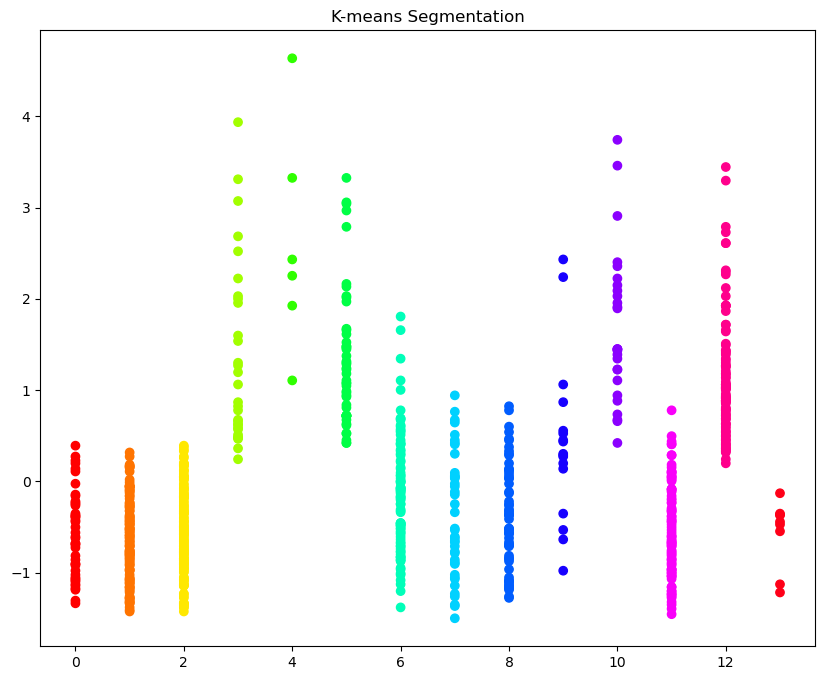

In [29]:
for i in data:
    for j in data:
        if i == j:
            continue
        x_axis = data[i]
        y_axis = data[j]
        plt.figure(figsize = (10, 8))
        color_map = plt.cm.get_cmap('hsv', len(np.unique(data['clusterLabel'])))
        plt.scatter(x_axis, y_axis, c=data['clusterLabel'],cmap=color_map)
        plt.title('K-means Segmentation')
        plt.show()

## Q1. When should we split the data into training and testing sets when using K-means clustering, and why?

### If you want to use K-means clustering to help with a machine learning task, like predicting outcomes or classifying data, you may need to split your data into two parts: one for training and one for testing. You would only use K-means clustering on the training data, and then use the clusters it creates as part of your machine learning model. Finally, you would check how well your model performs on the testing data to make sure it can handle new data well.


## Q2. Why do we need to scale the features before performing K-means clustering?
### K-means clustering algorithm is dependent on distance, and the calculation of distances between data points can be impacted by the scales of the features. If the features are on varying scales, K-means clustering could favor features with larger scales, resulting in incorrect clustering assignments and suboptimal performance.